In [ ]:
# go through the entire dataset to find out the desired slice range for the model

In [2]:
# Necessary Library Calls
import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.util import montage 
from skimage.transform import rotate
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim
from tqdm import tqdm
from pylab import *
device = torch.device('cuda')
import gc


In [3]:
# Global variable definition
IMAGE_PATH = 'data/MICCAI_BraTS_2019_Data_Training'
CSV_FILE='data/MICCAI_BraTS_2019_Data_Training/name_mapping.csv'
MODEL_PATH = 'prediction/unet/model'
# ignore the first 70 images in a file as there is nothing much to see
SLICE_STARTS= 70
# number of slices, , meaning how many slices we are taking from one image file  
SLICE_NUM = 10
# image dimentions are not adjusted 
IMAGE_SIZE=240
# helper function for iamge transformation to tensor form
transform = transforms.ToTensor()
# Batch size constant
BATCH_SIZE=2
# input_channel corresponds to the number of different types of images used: 
# e.g: T1, T2, T1_flair, etc. 
# only using one type of images at the moment
INPUT_CHANNEL=1
EPOCH = 5
LEARNING_RATE = 0.01

In [4]:
def get_image(image_path,image_cat,image_id,image_type):
    t1_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t1.nii.gz').get_fdata()
    t1ce_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t1ce.nii.gz').get_fdata()
    t2_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t2.nii.gz').get_fdata()
    seg_data=nib.load(image_path+'/'+image_cat+'/'+image_id+'/'+image_id+'_seg.nii.gz').get_fdata()
    flair_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_flair.nii.gz').get_fdata()
    result={'t1':t1_data,'t1ce':t1ce_data,'t2':t2_data,'seg':seg_data,'flair':flair_data}
   
    return result[image_type]; 

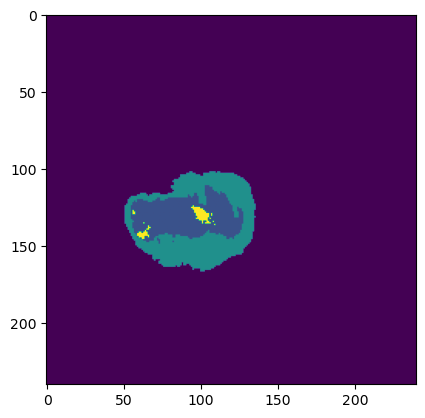

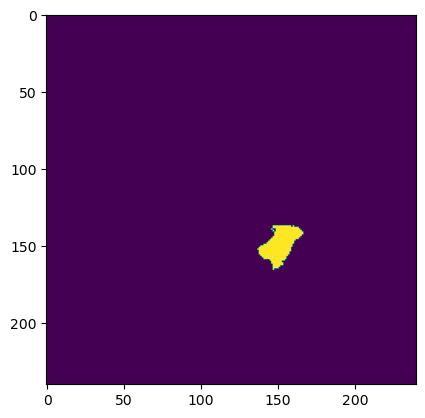

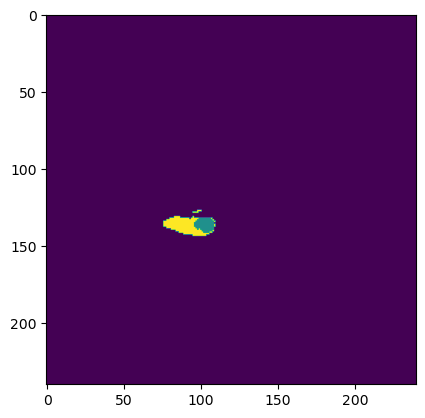

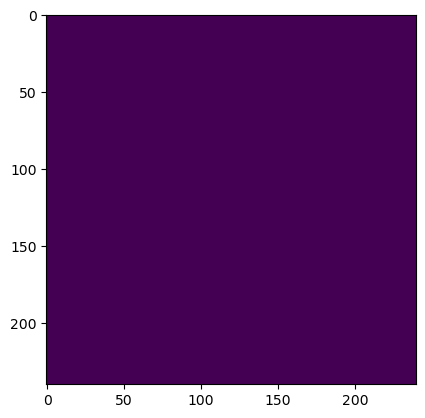

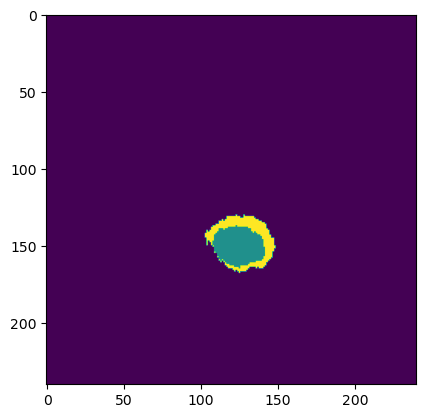

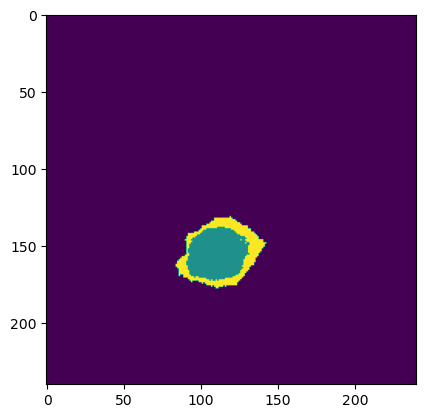

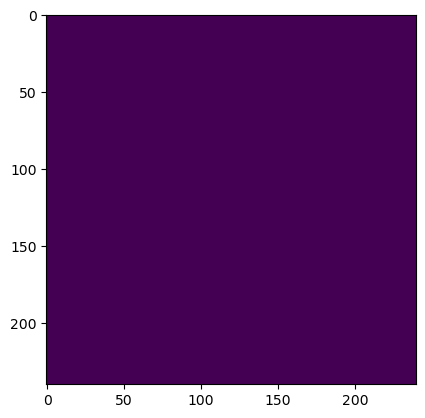

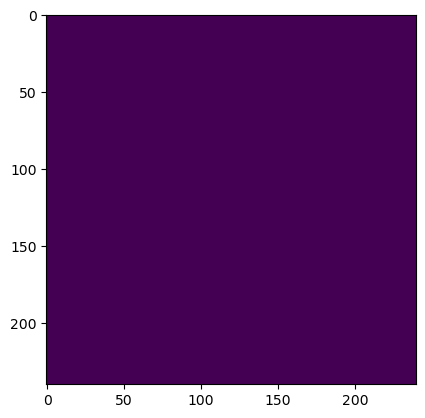

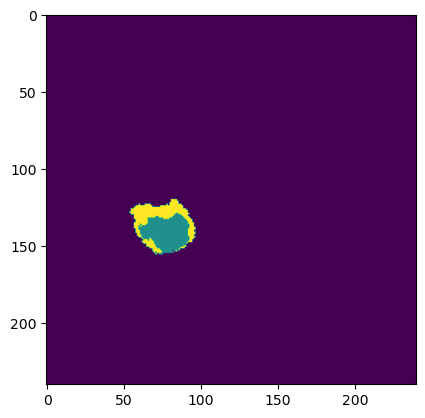

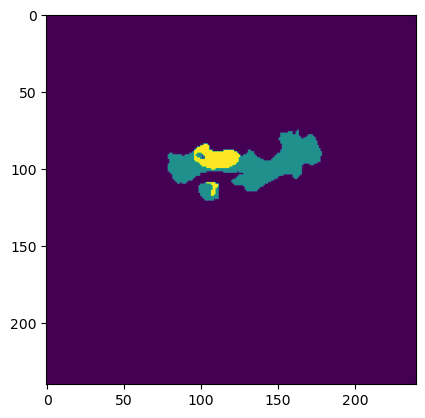

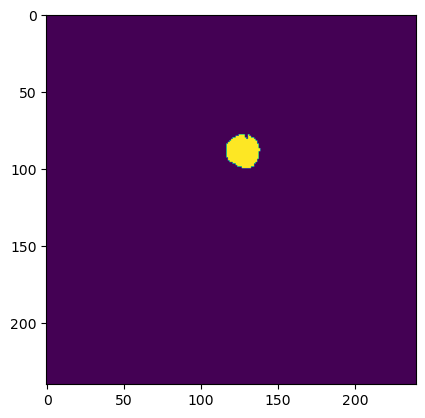

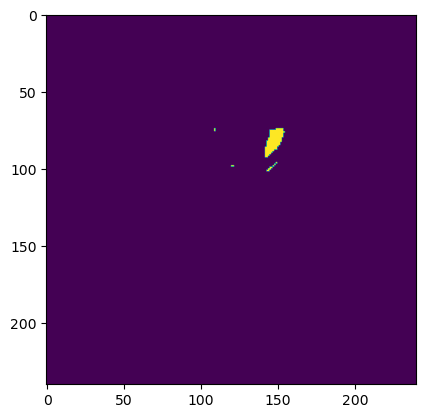

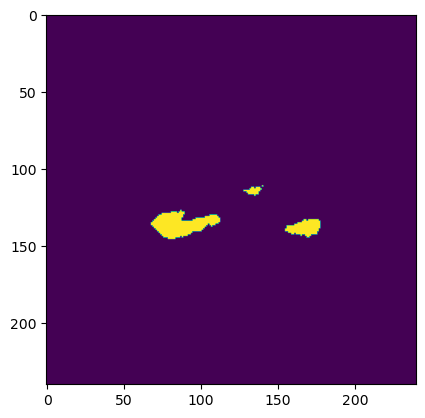

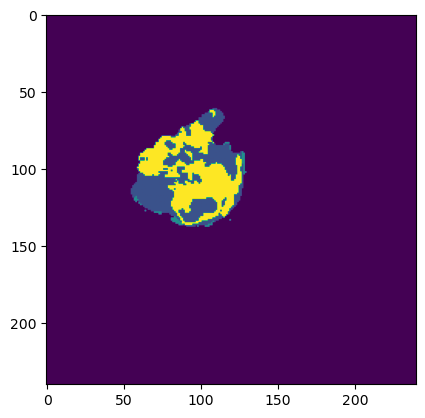

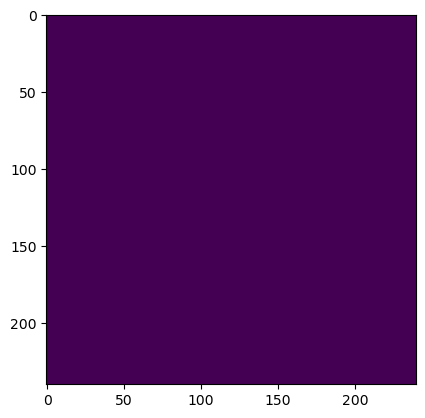

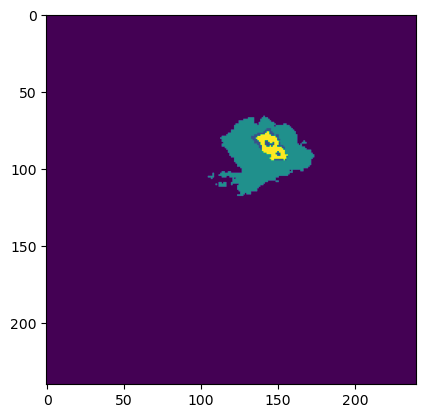

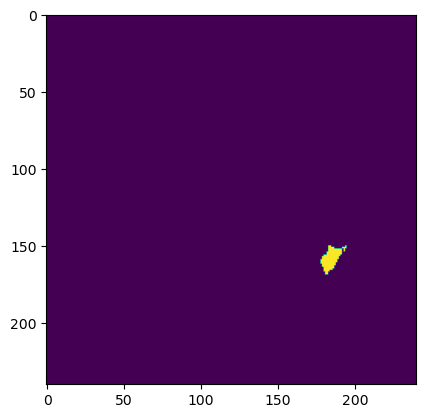

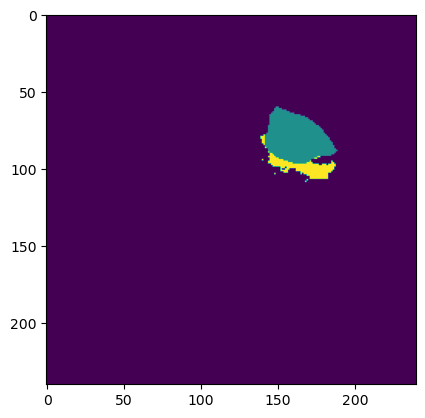

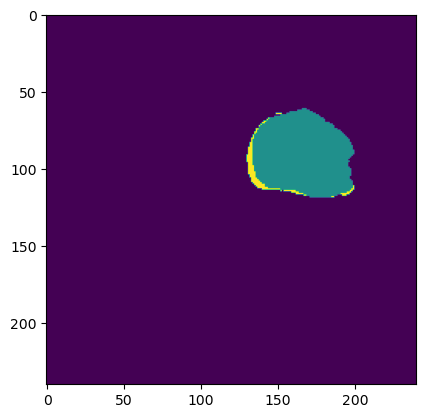

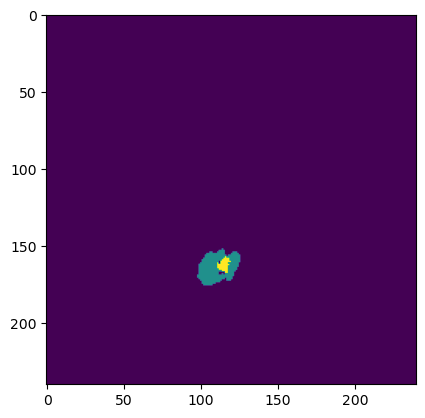

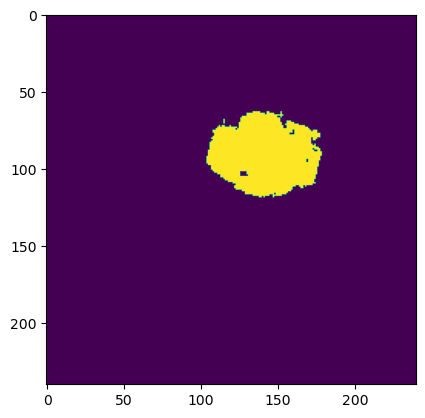

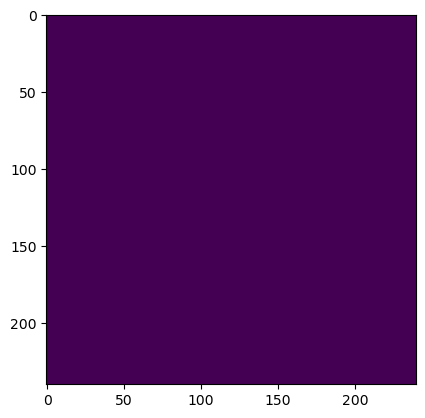

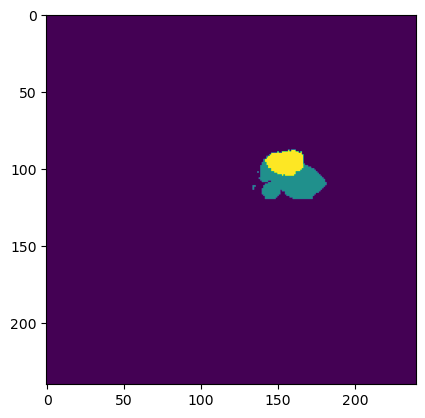

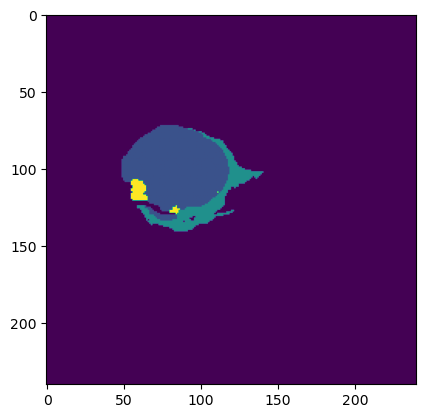

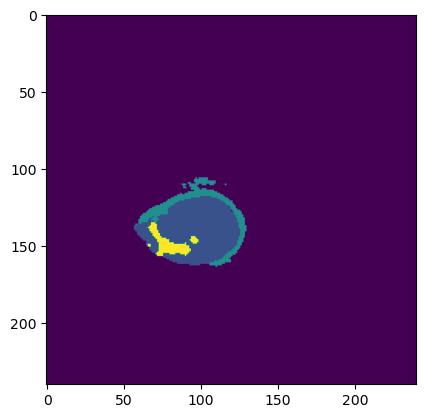

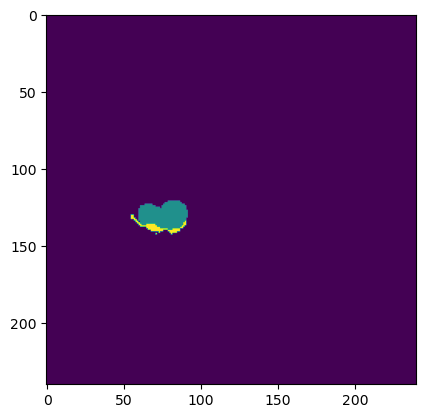

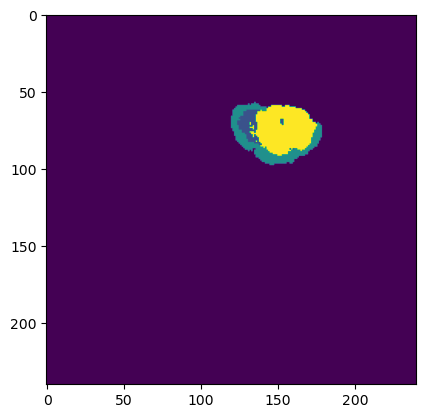

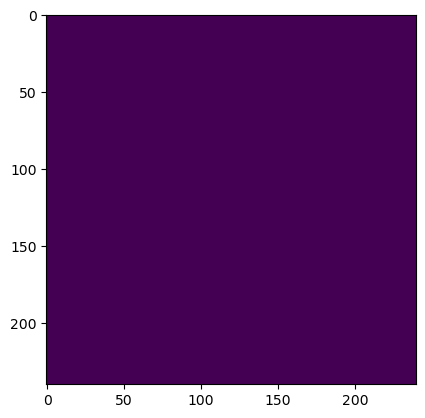

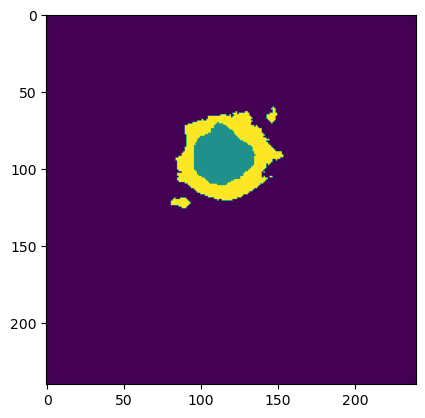

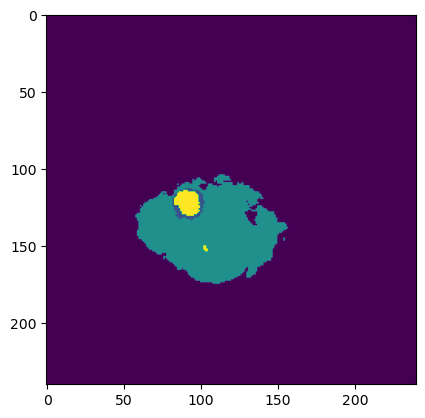

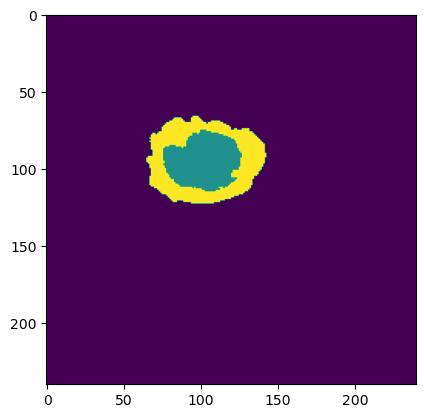

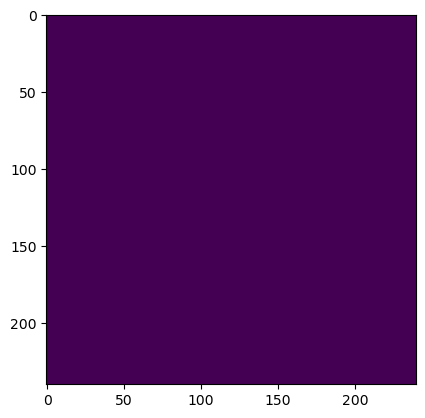

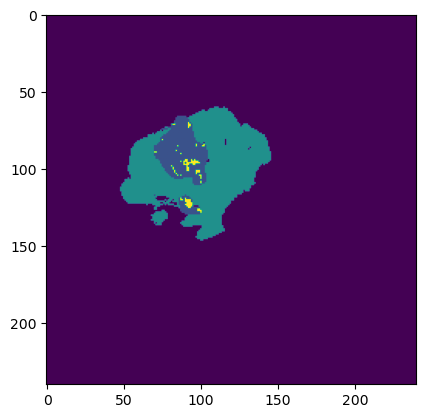

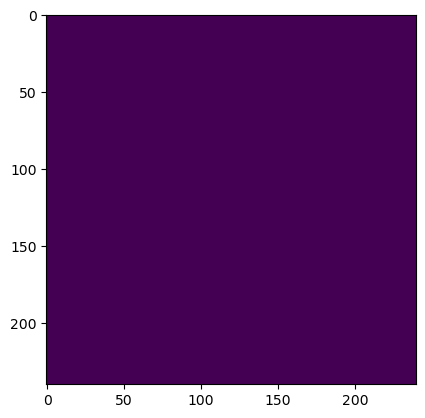

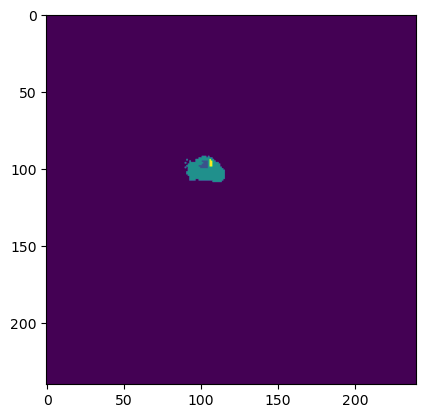

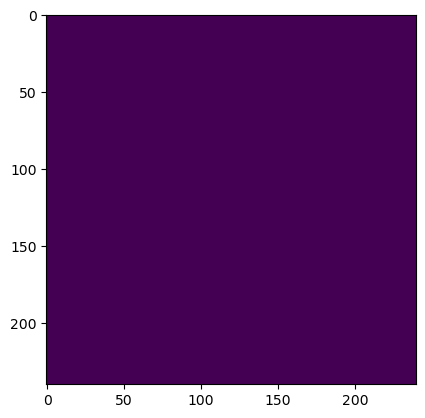

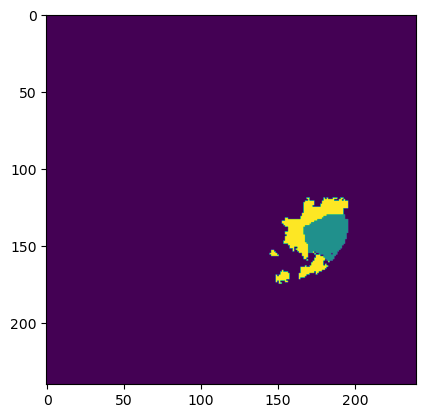

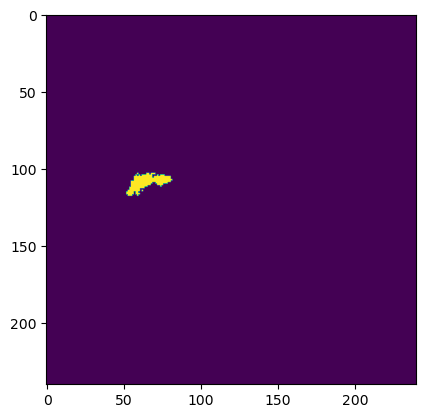

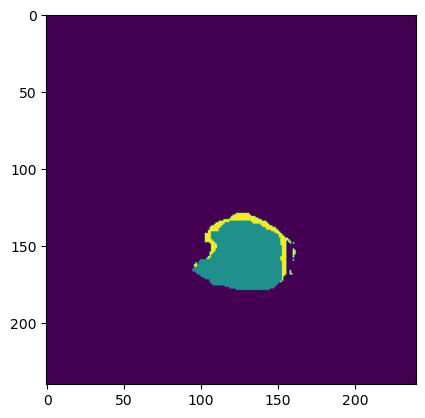

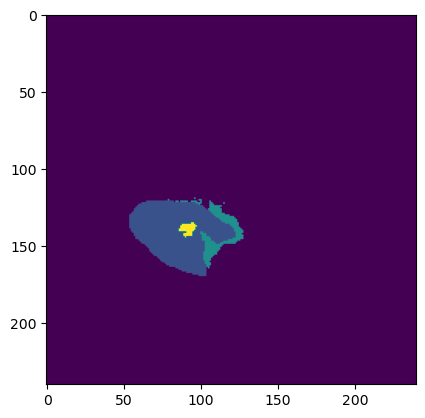

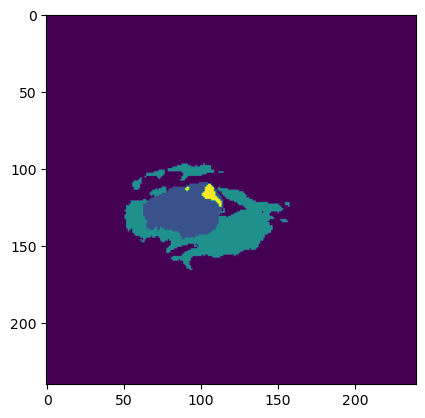

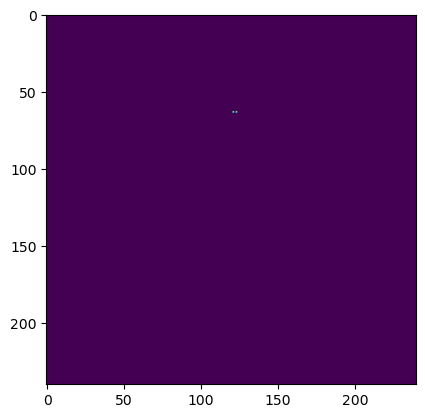

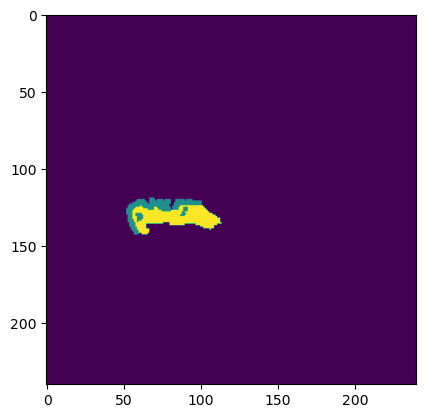

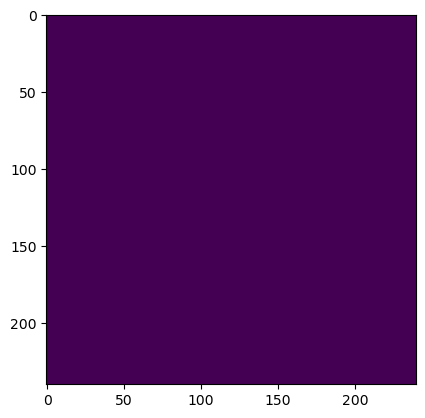

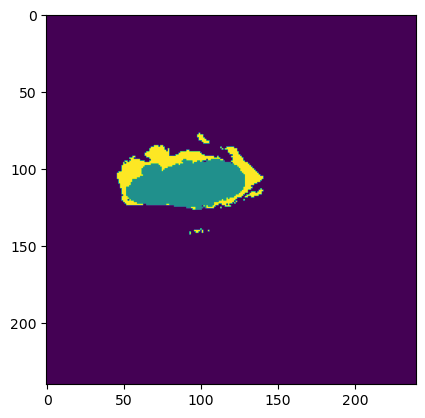

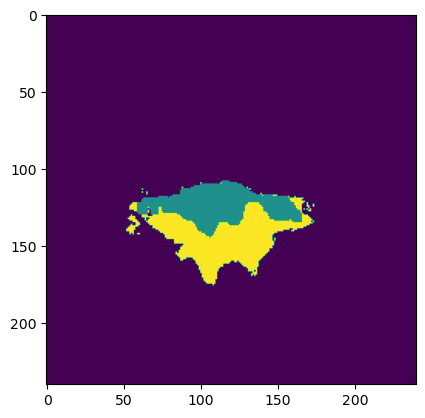

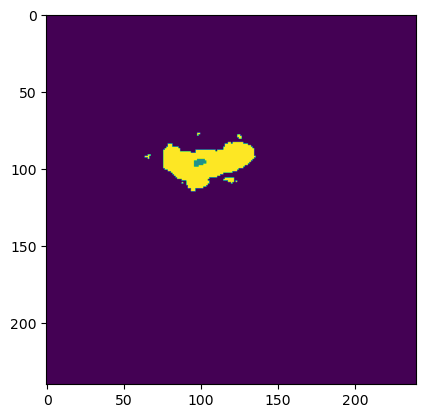

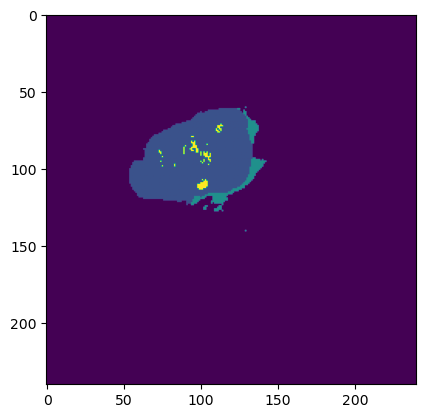

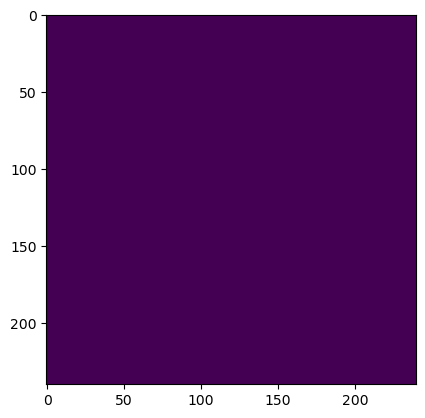

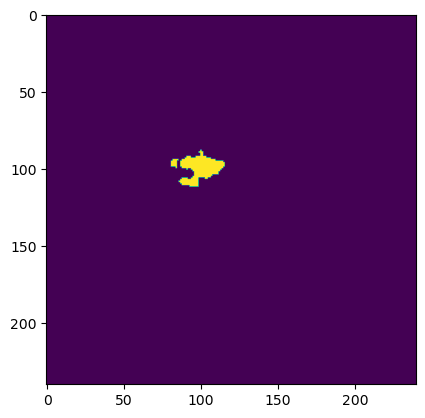

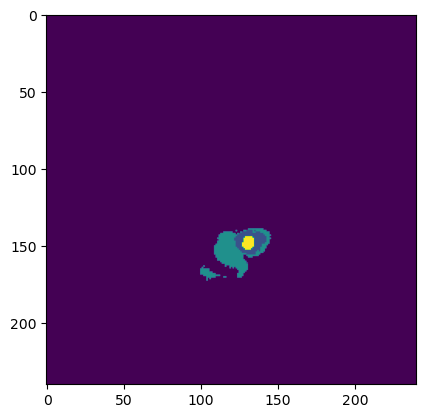

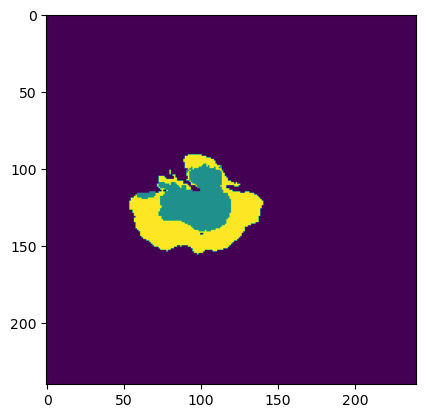

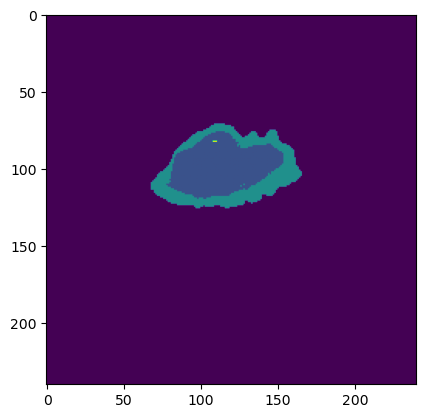

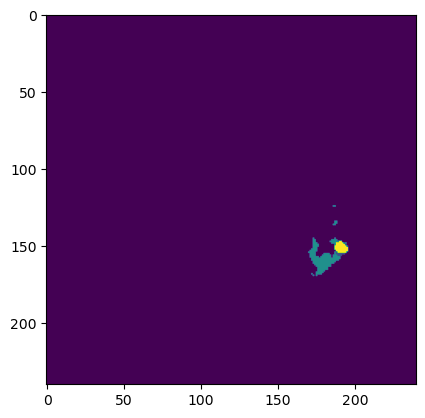

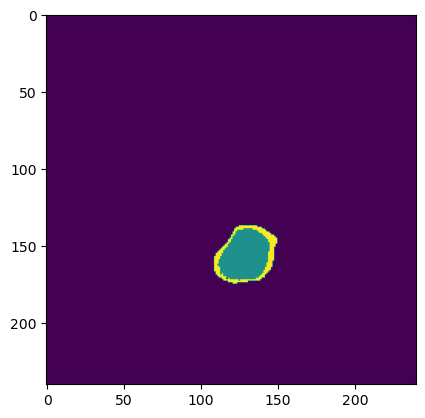

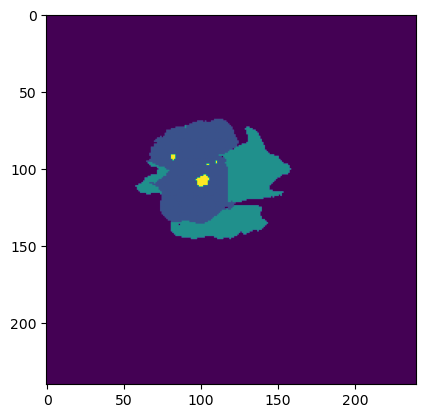

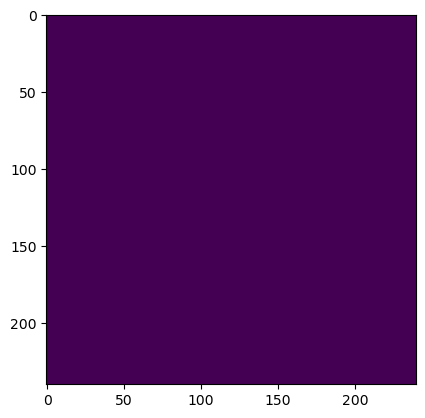

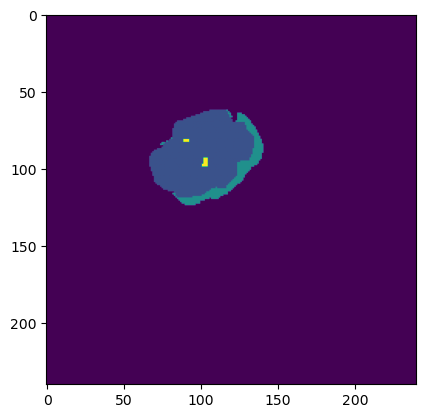

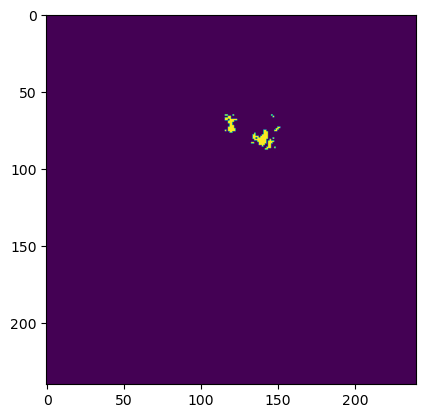

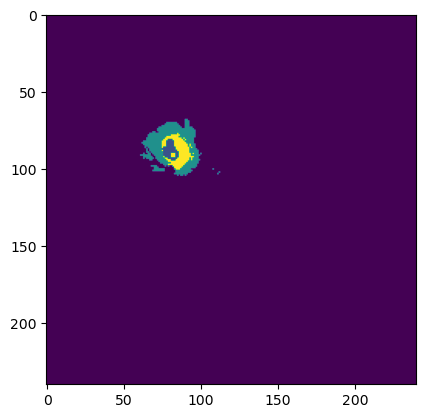

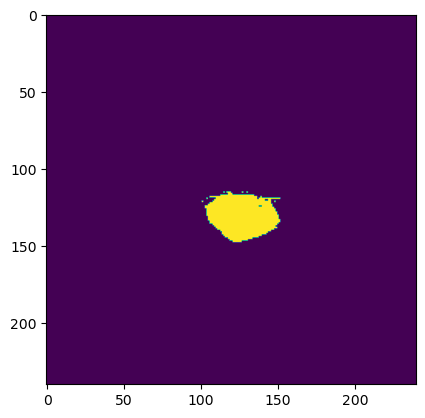

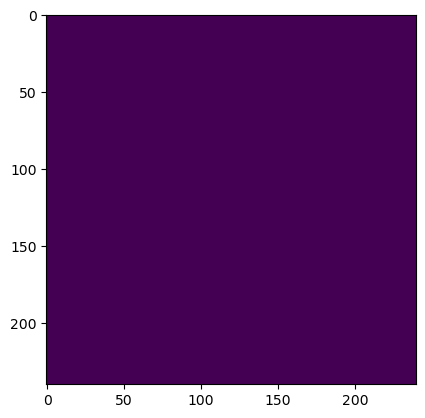

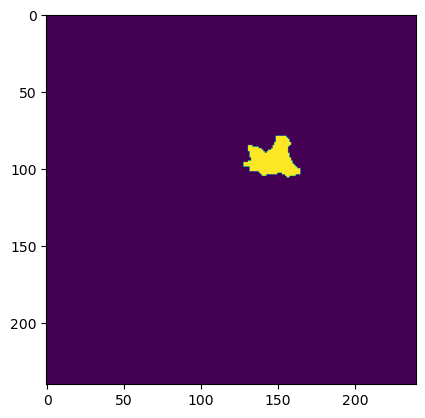

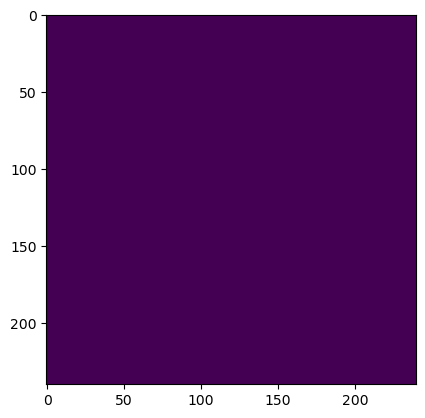

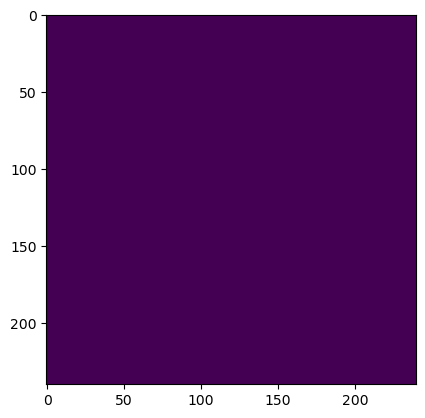

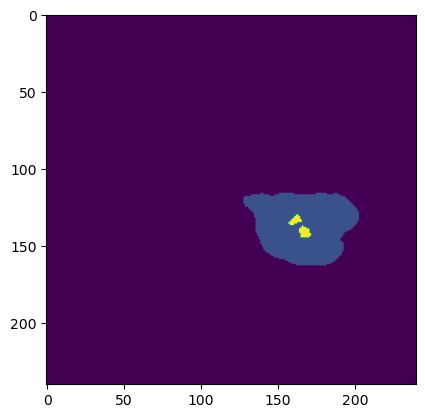

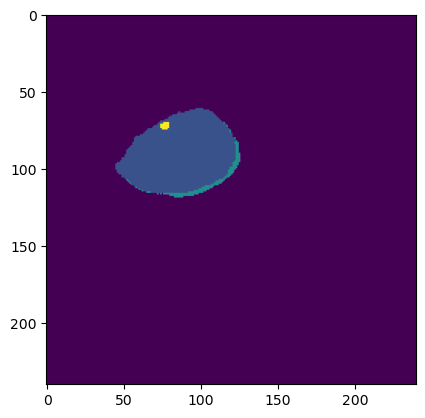

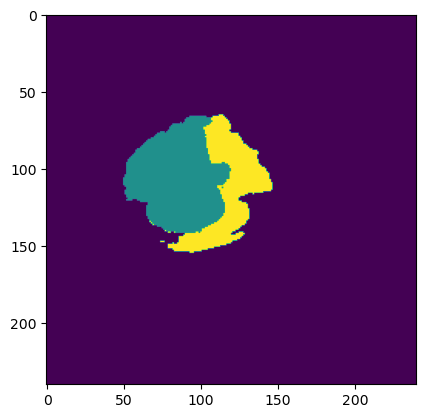

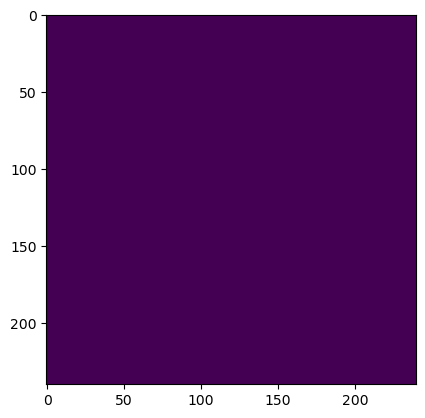

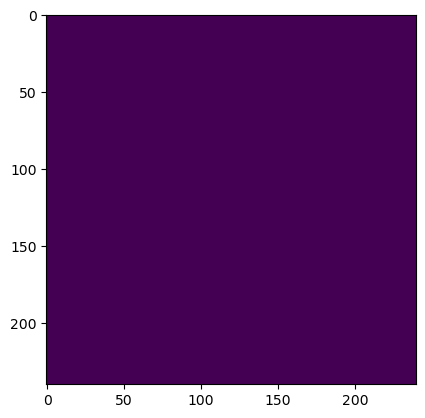

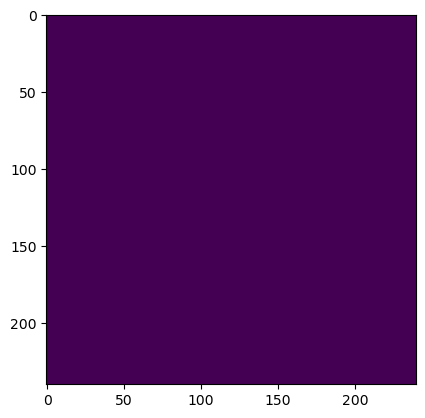

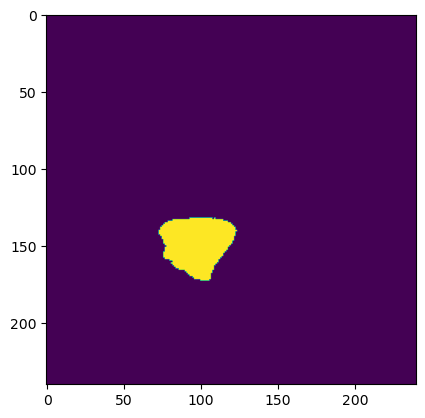

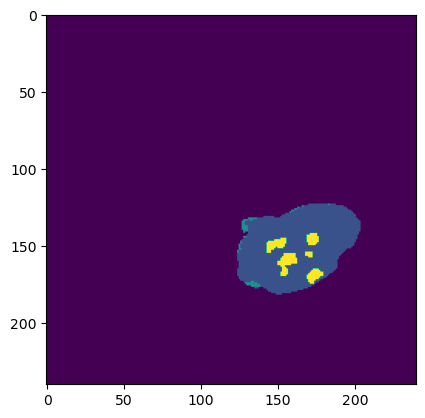

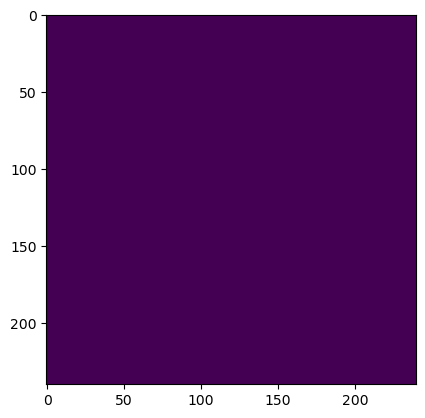

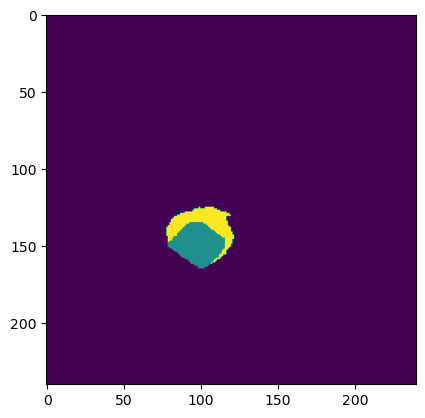

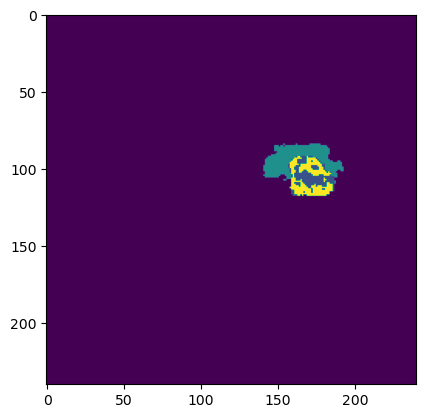

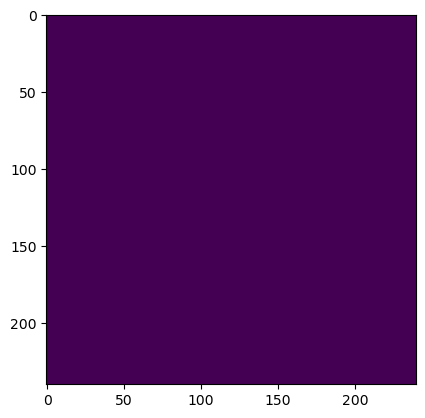

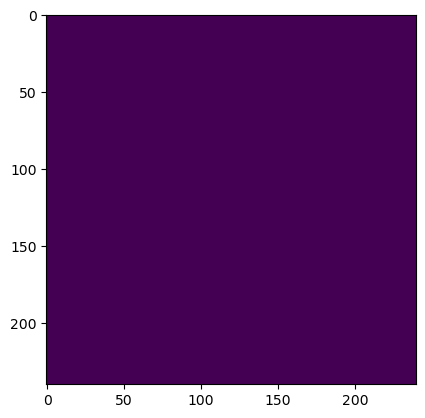

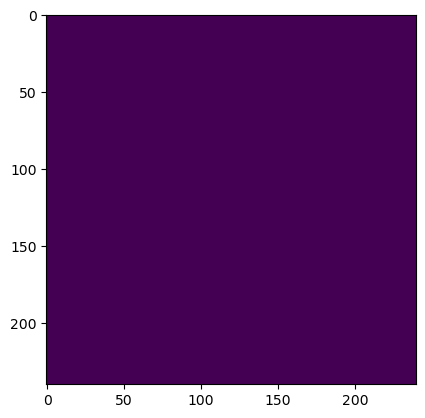

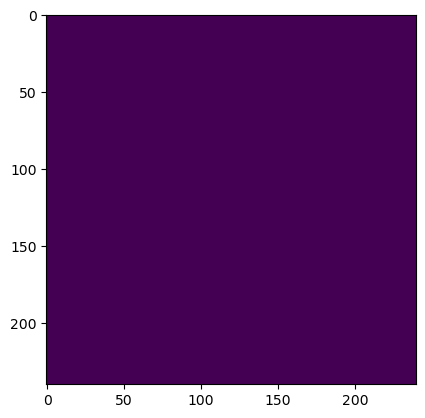

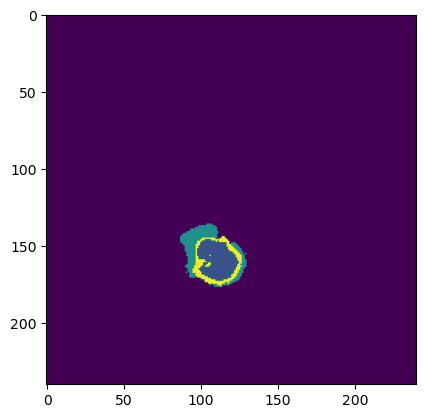

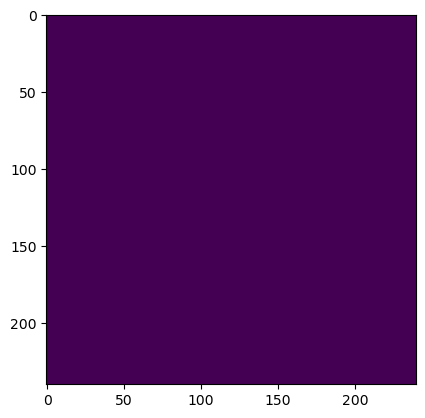

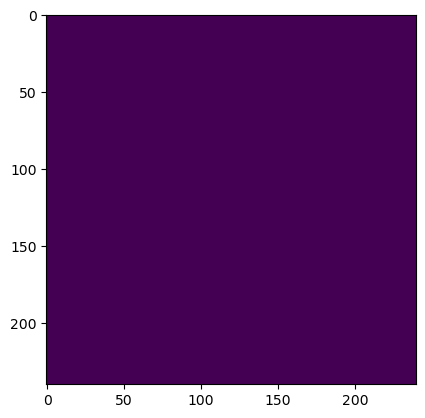

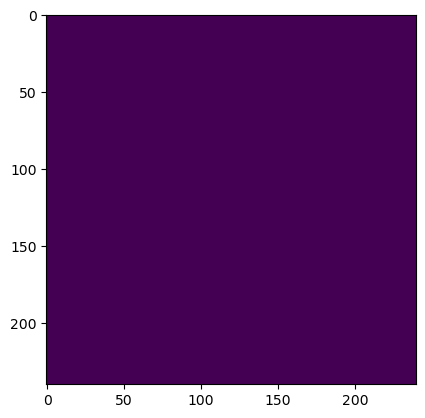

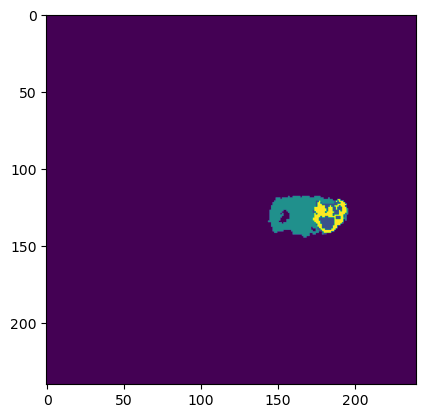

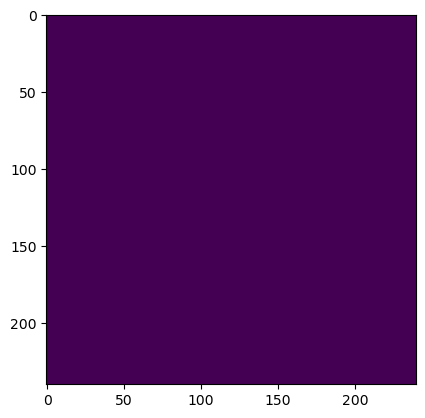

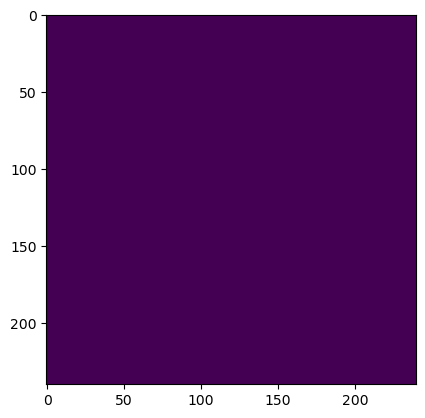

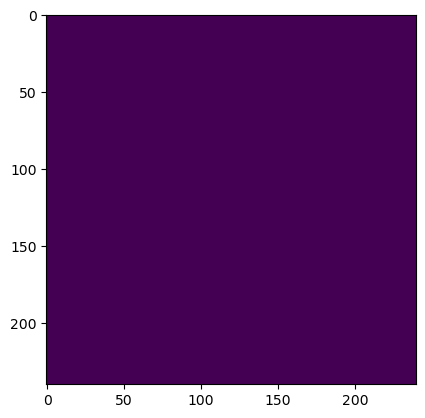

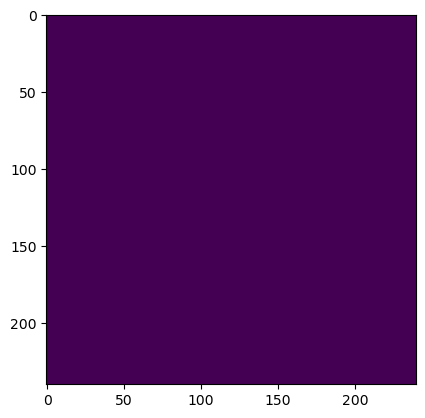

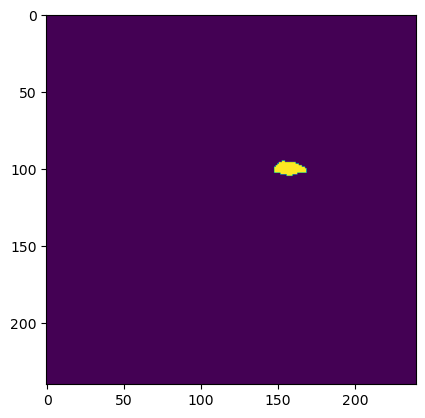

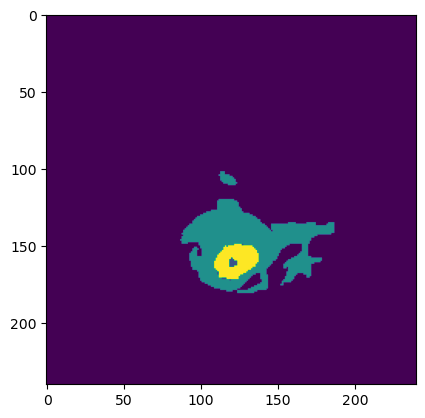

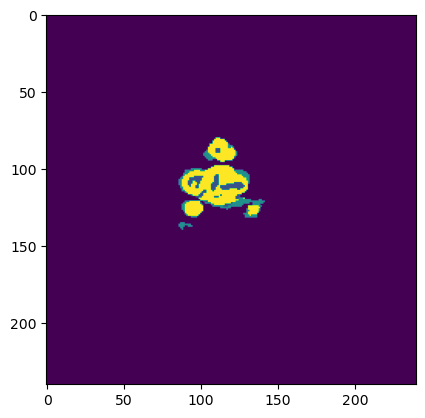

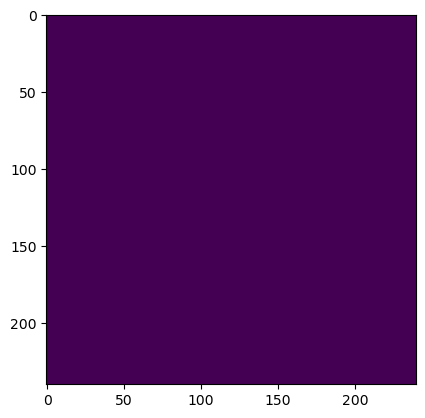

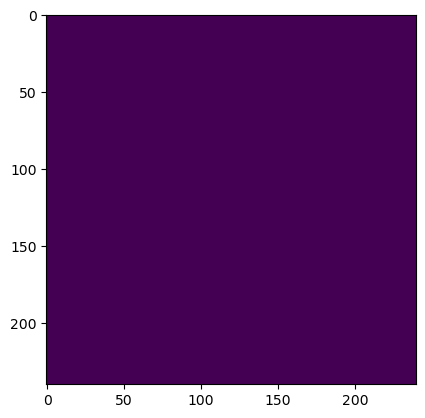

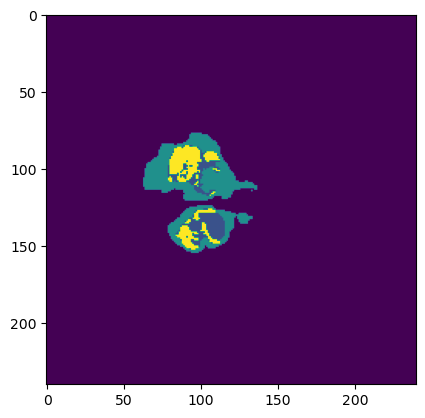

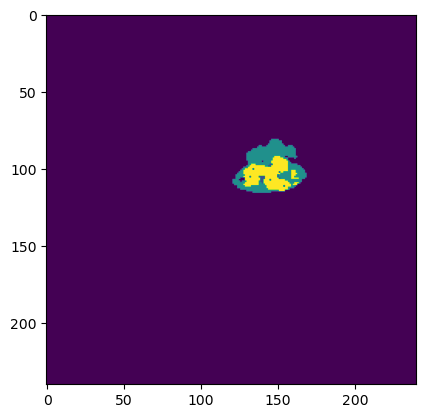

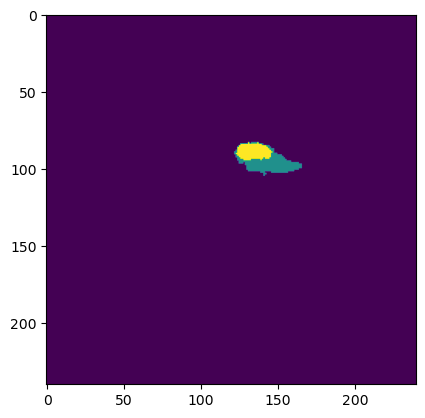

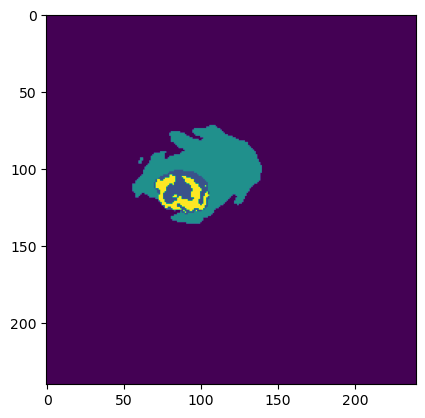

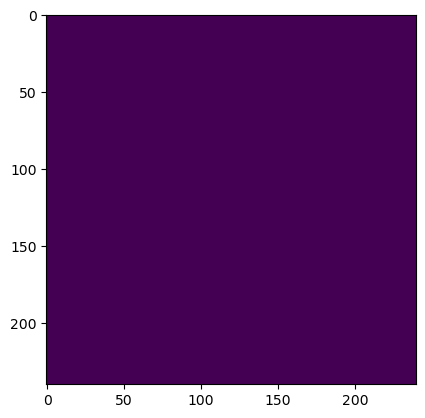

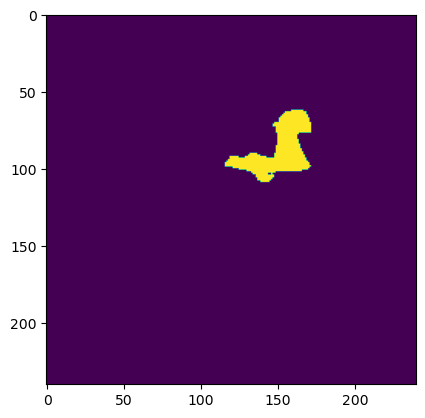

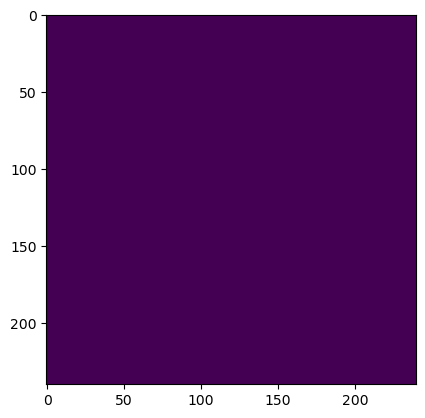

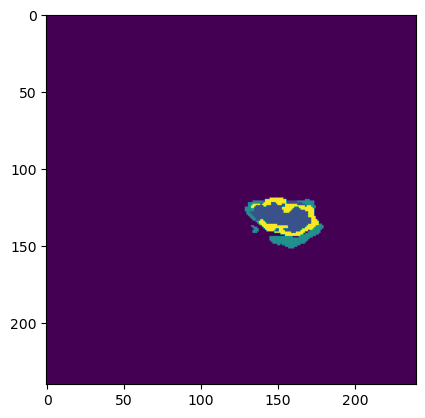

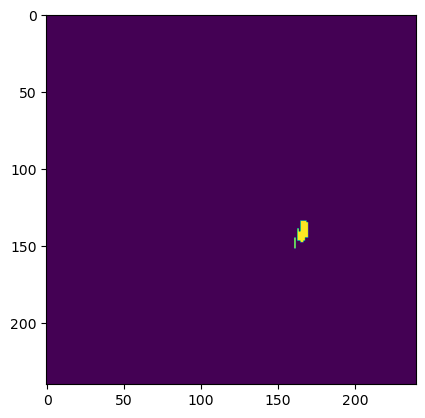

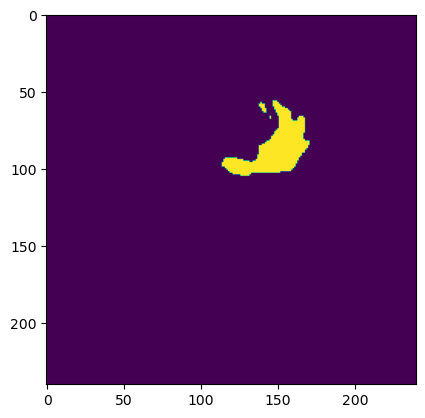

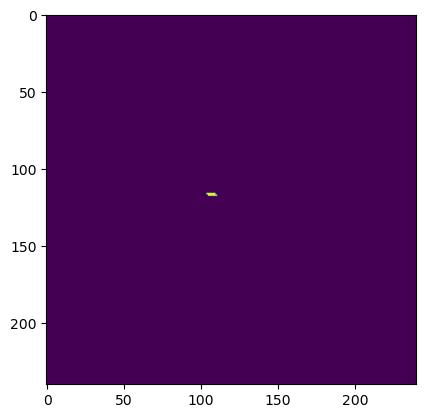

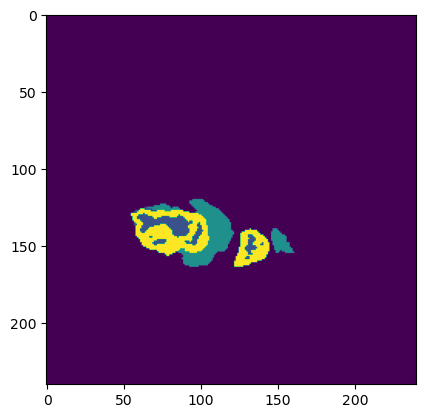

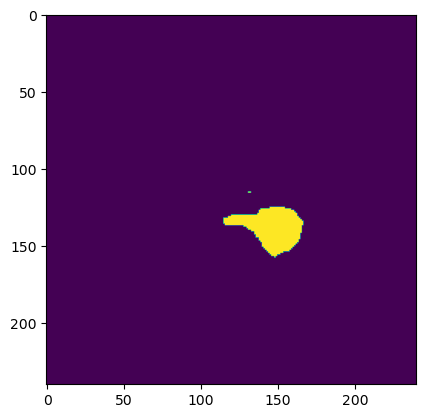

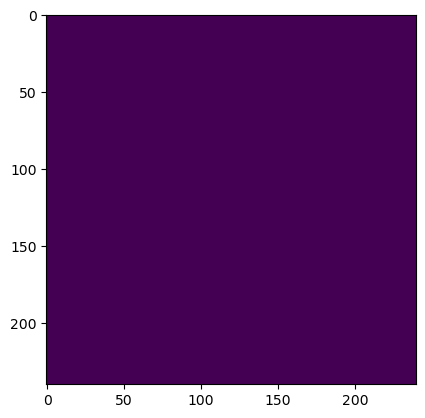

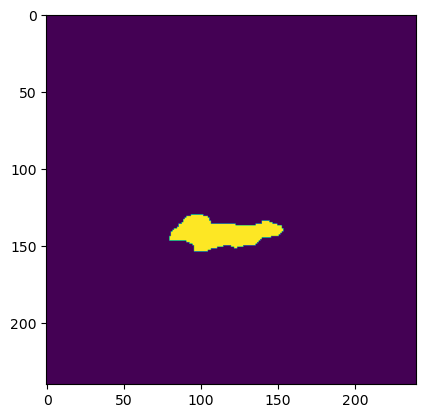

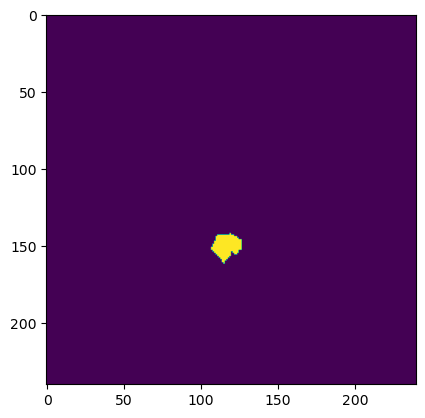

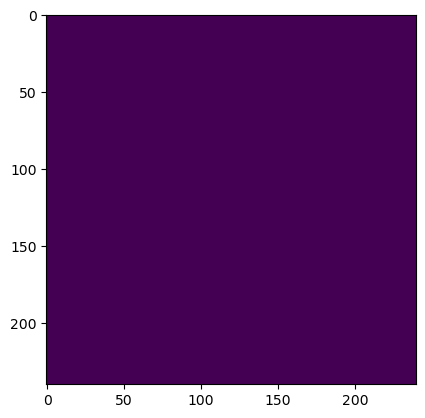

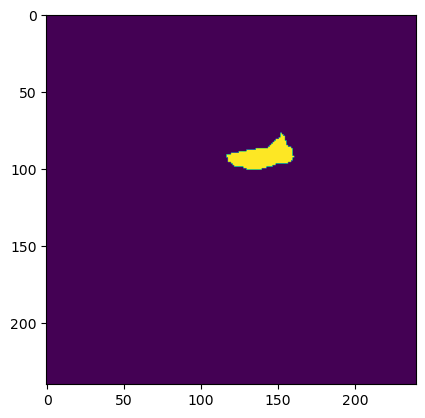

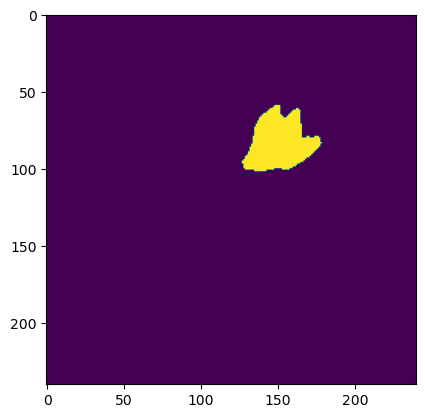

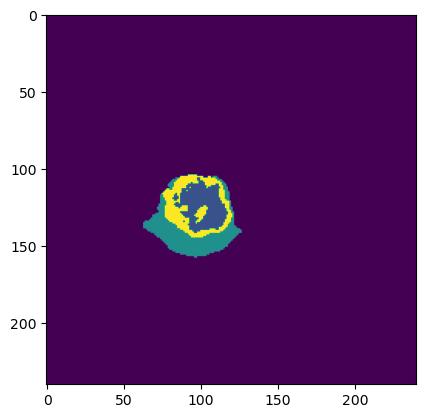

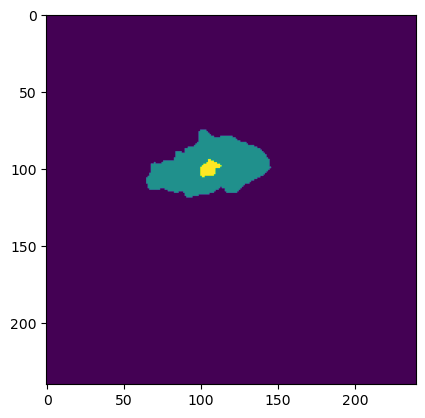

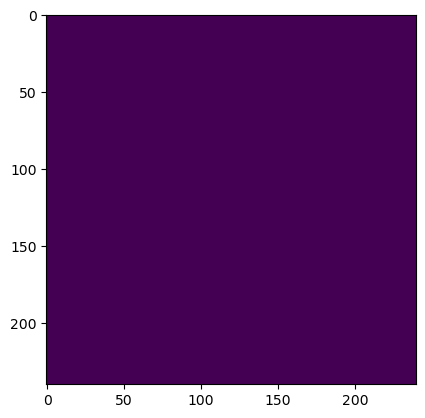

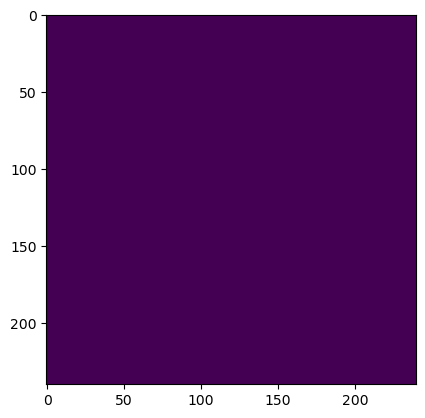

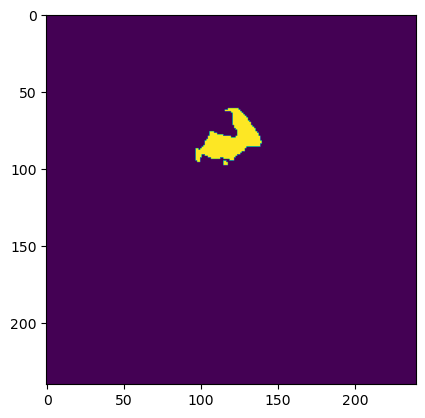

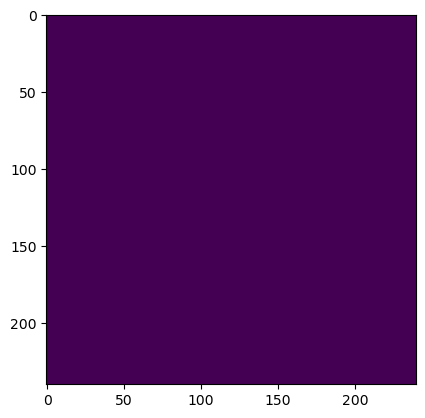

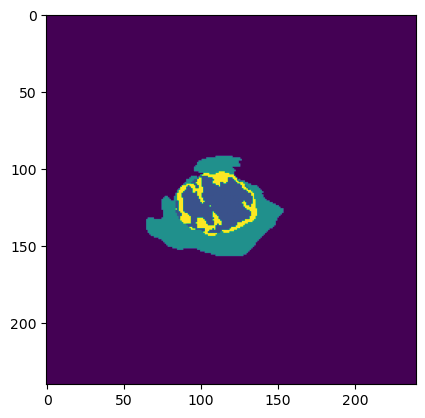

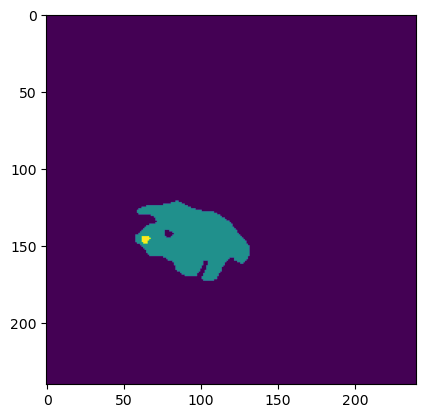

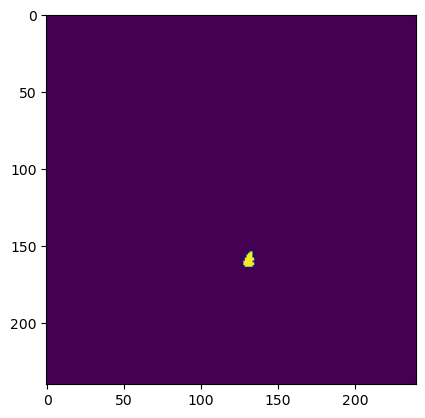

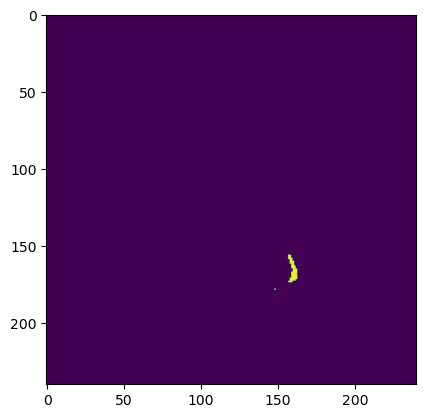

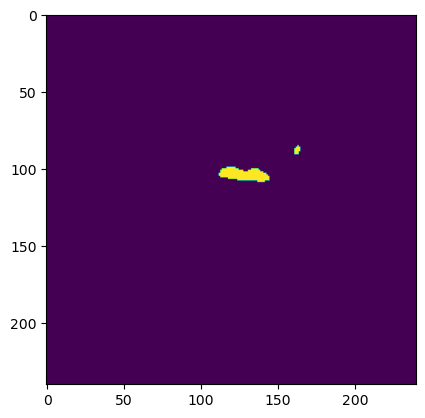

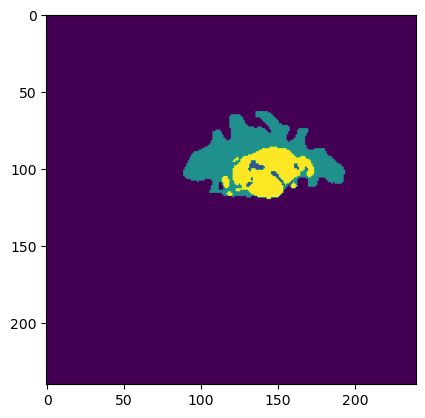

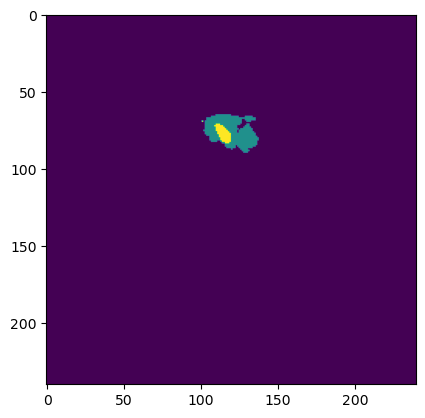

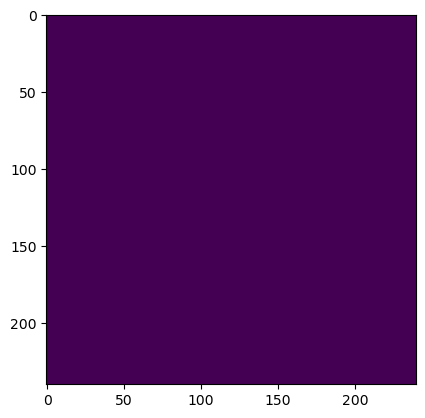

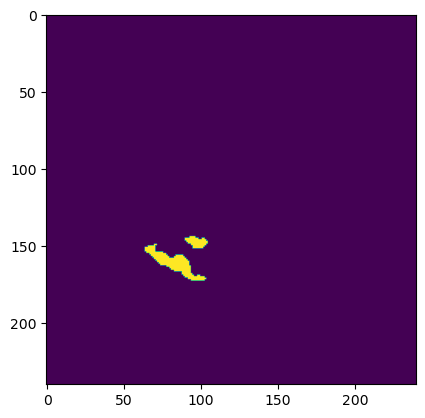

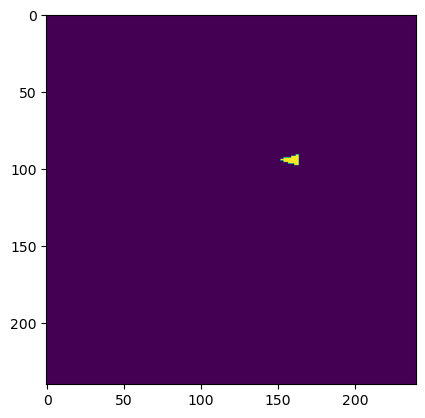

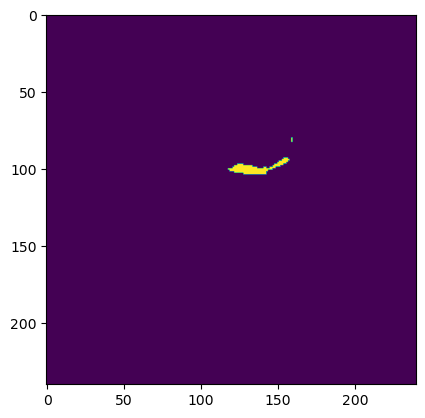

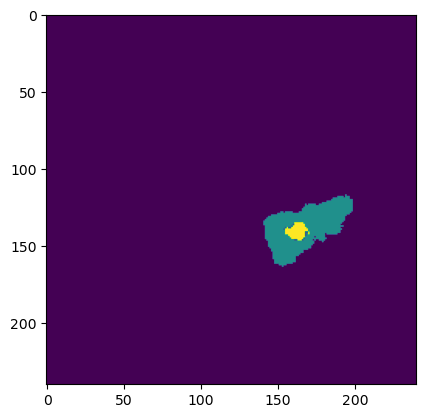

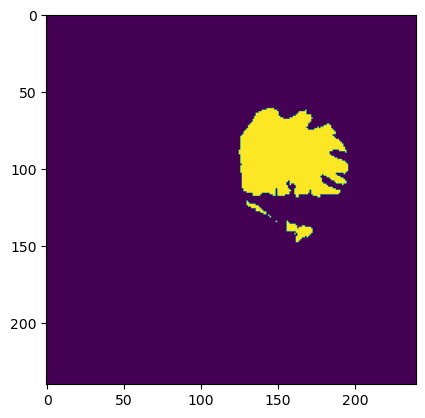

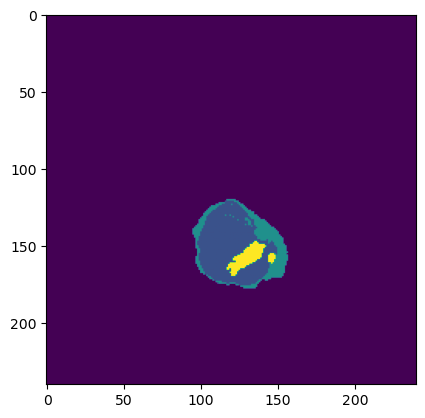

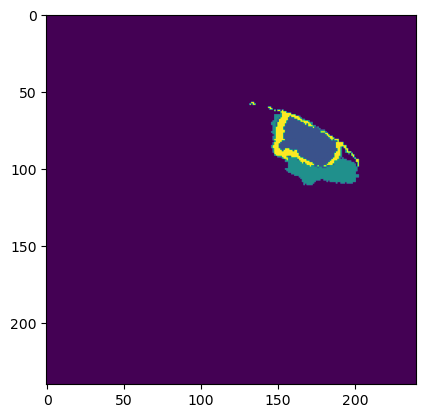

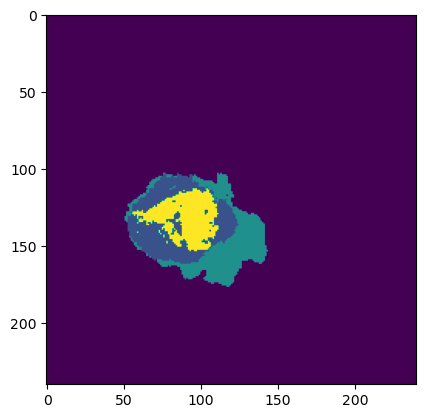

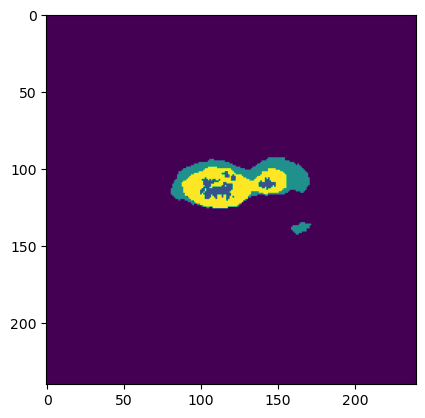

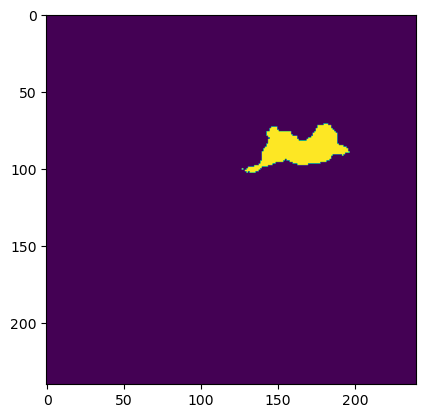

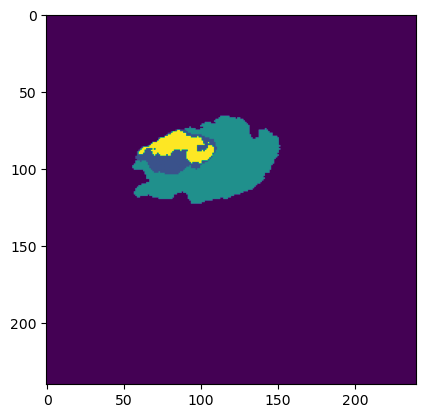

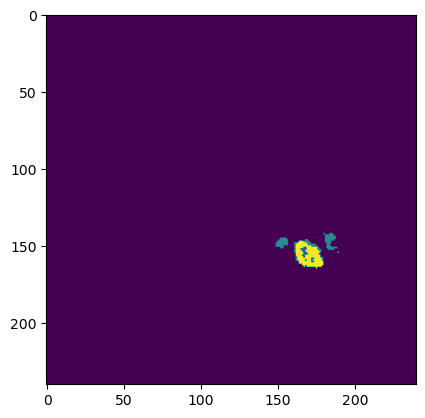

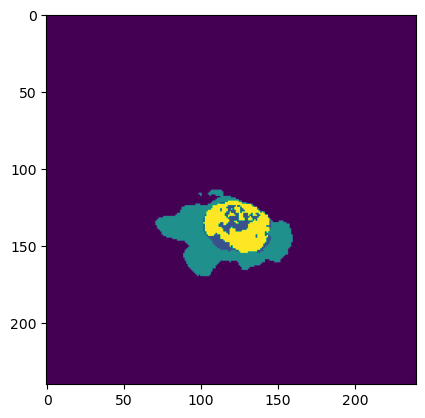

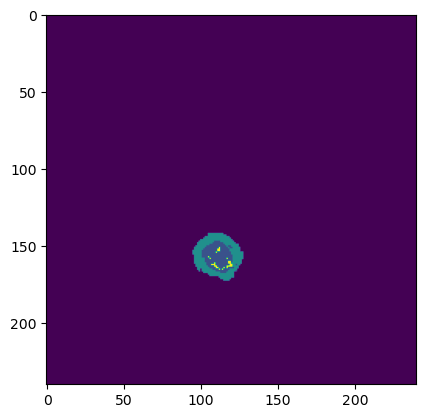

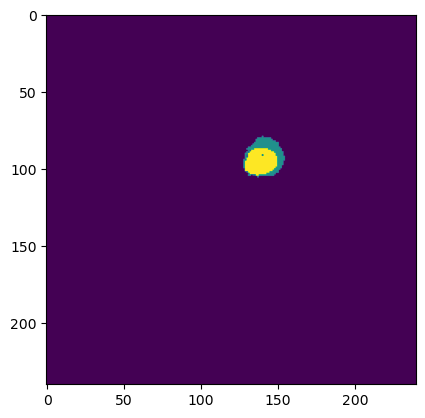

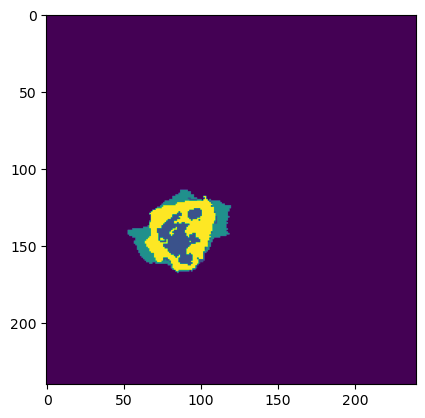

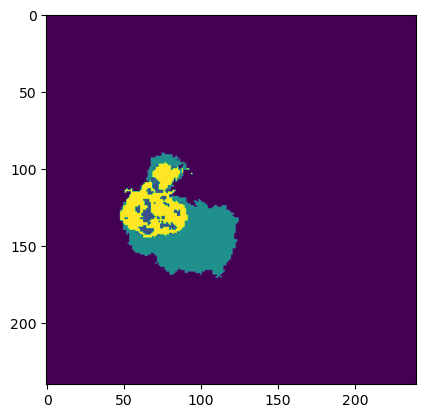

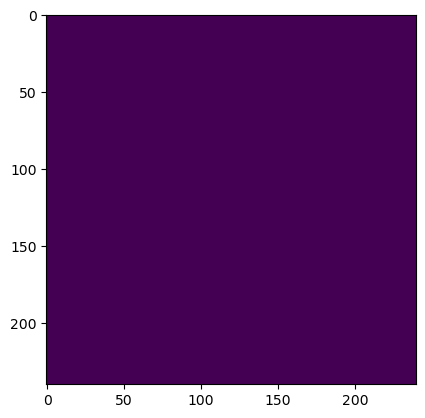

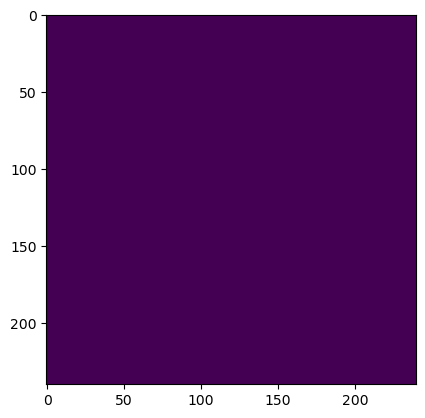

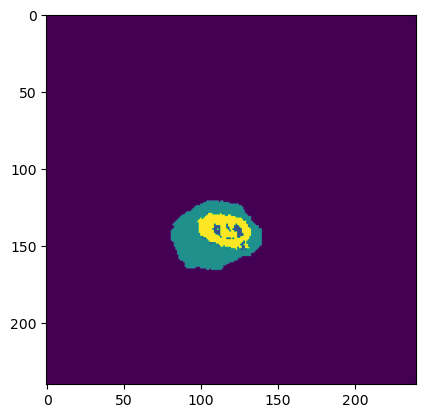

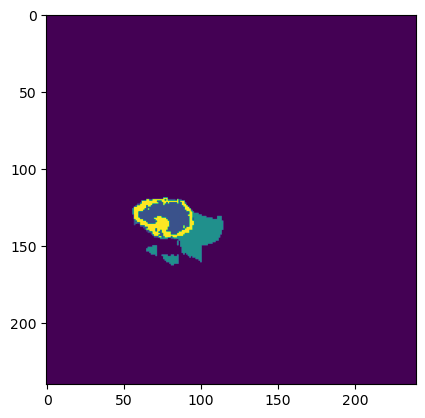

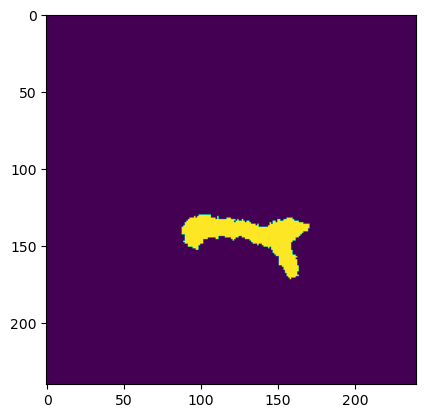

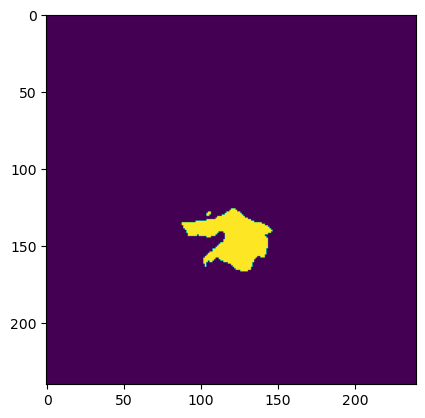

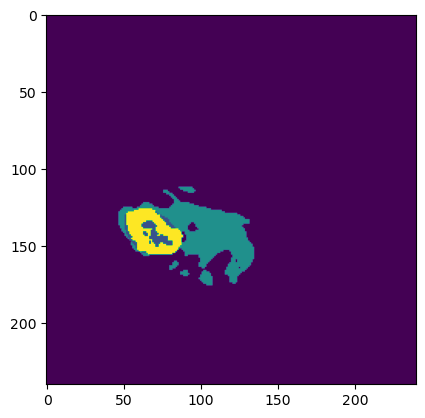

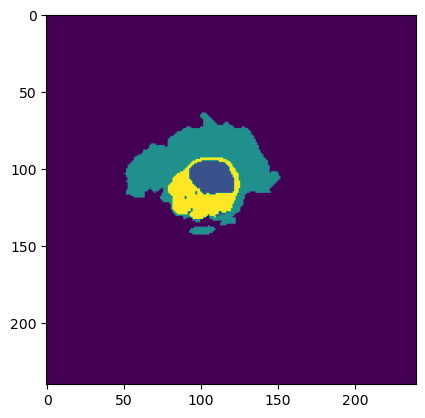

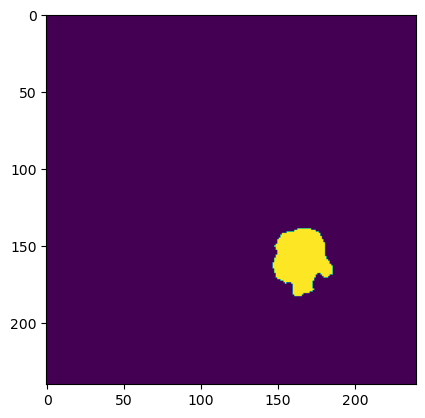

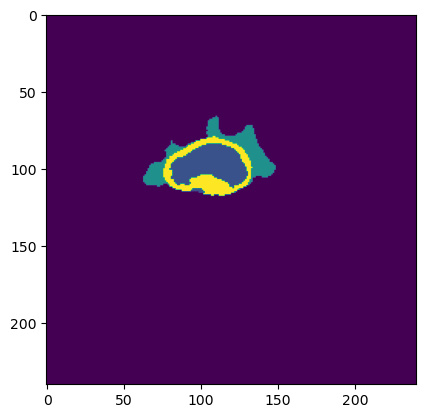

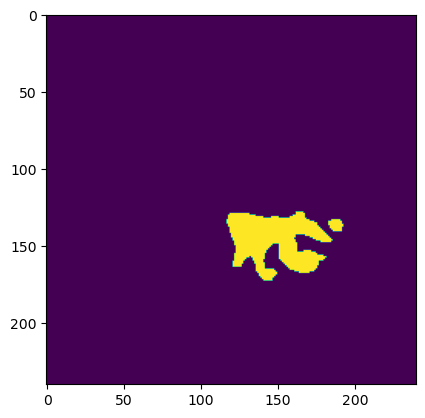

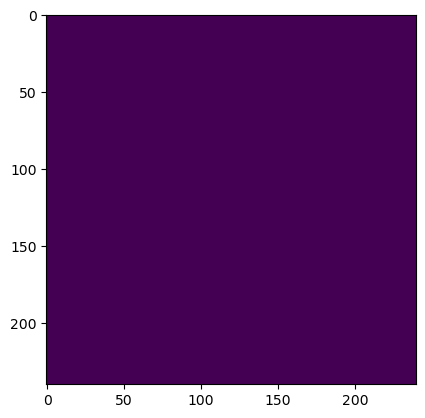

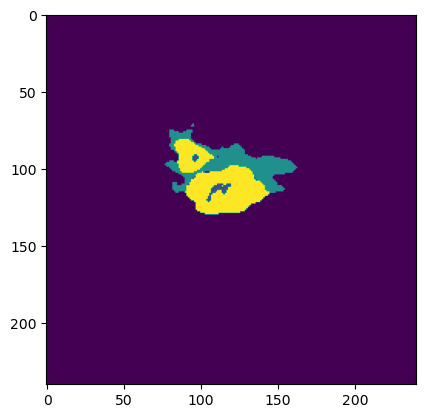

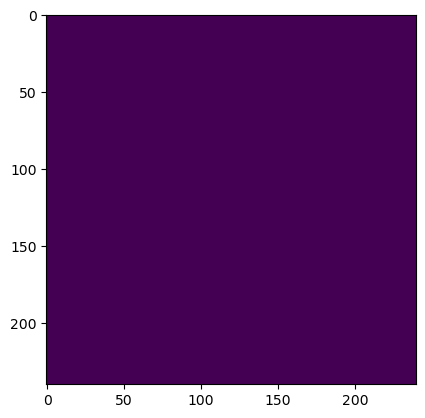

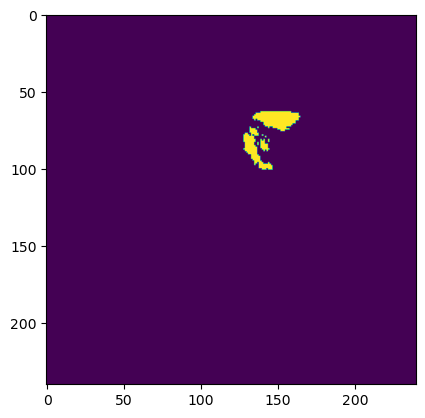

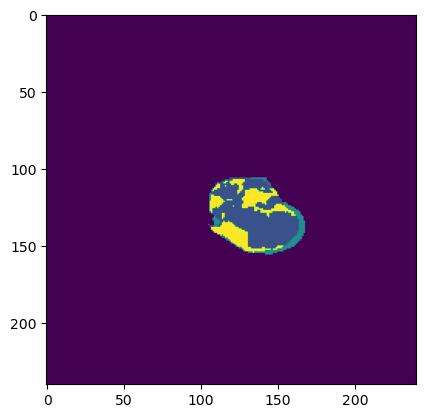

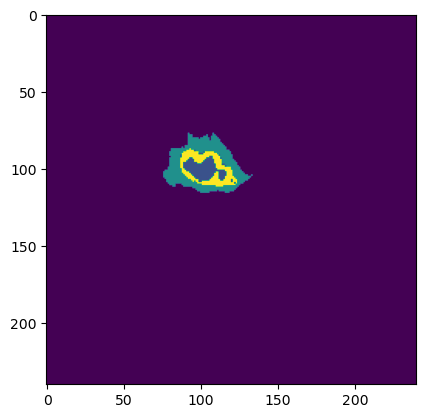

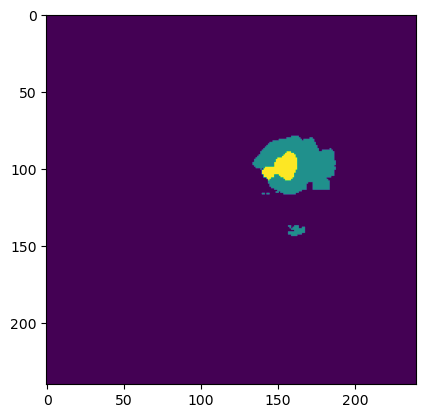

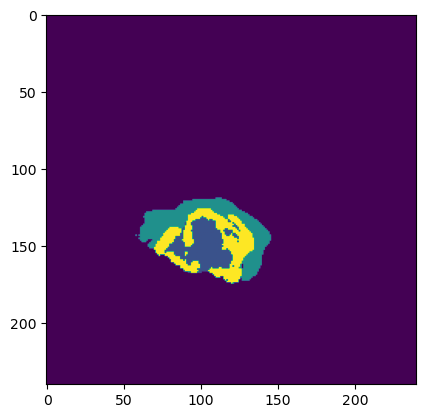

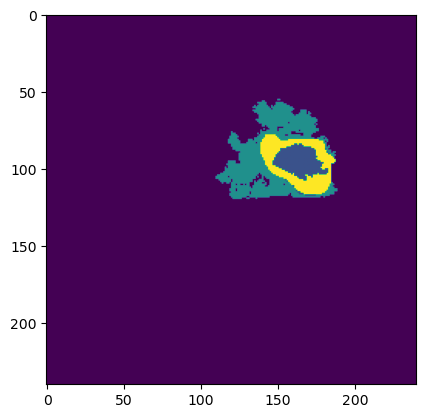

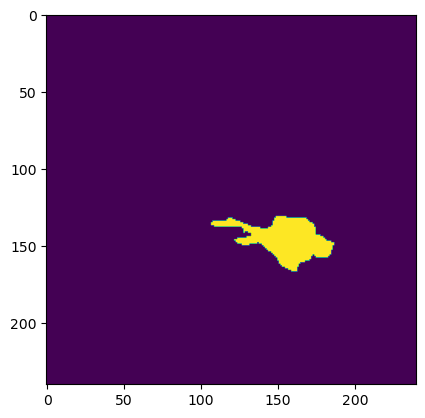

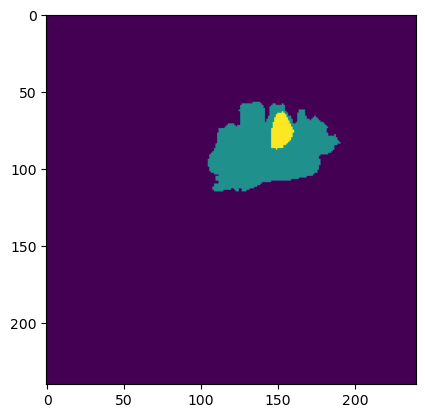

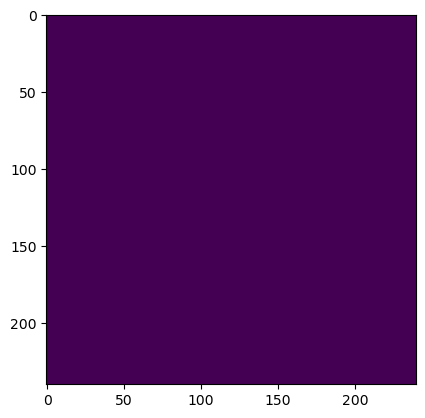

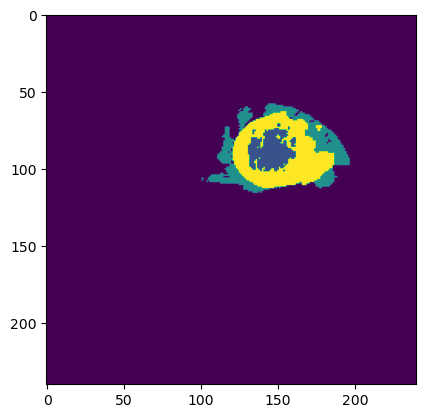

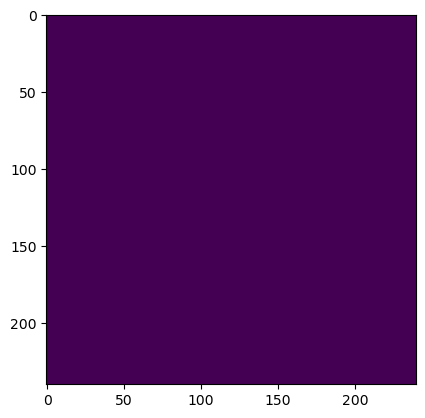

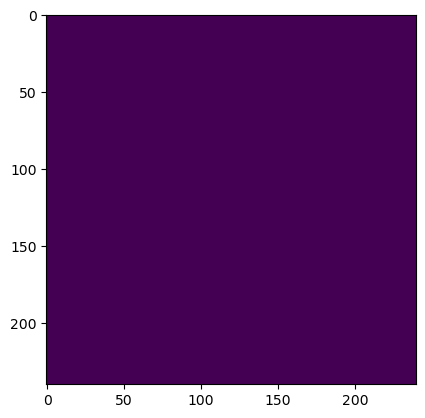

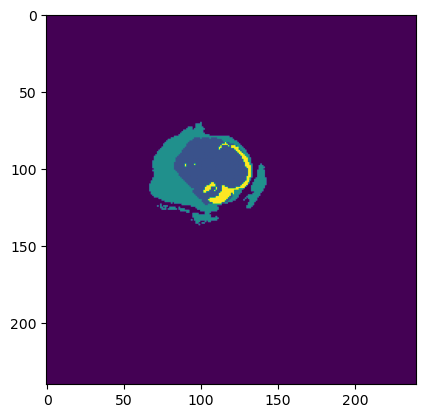

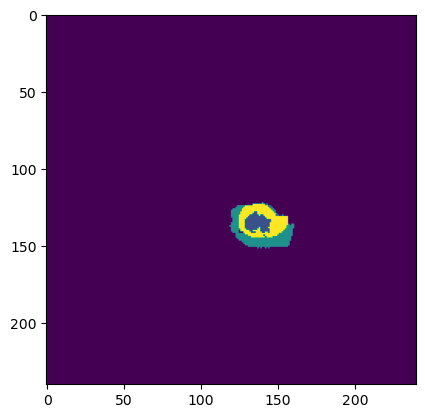

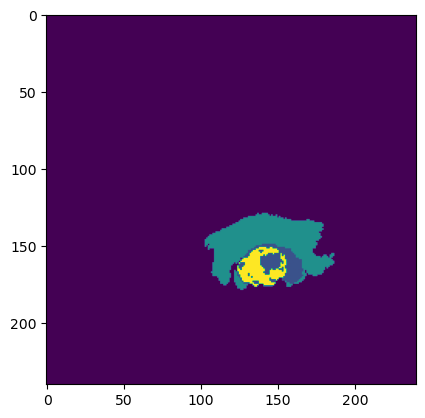

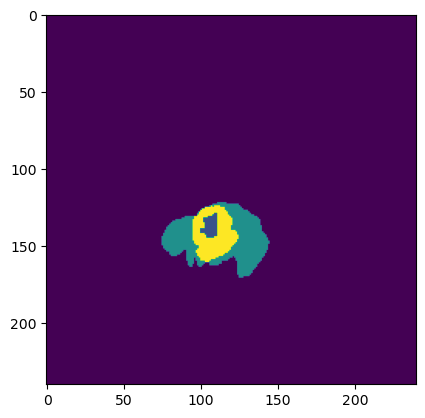

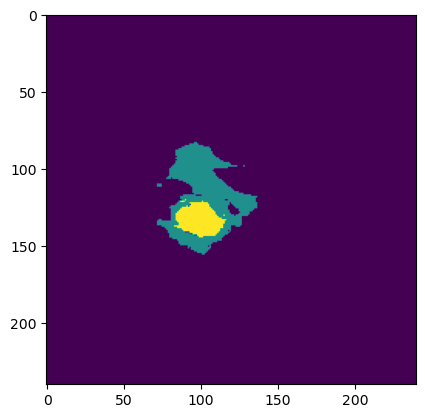

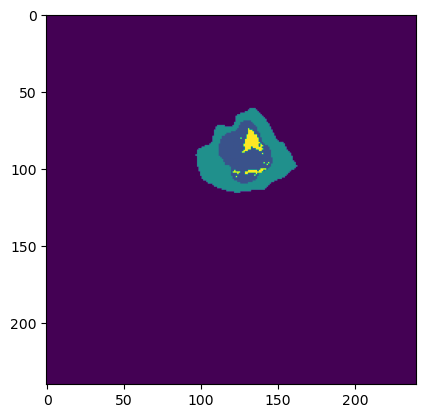

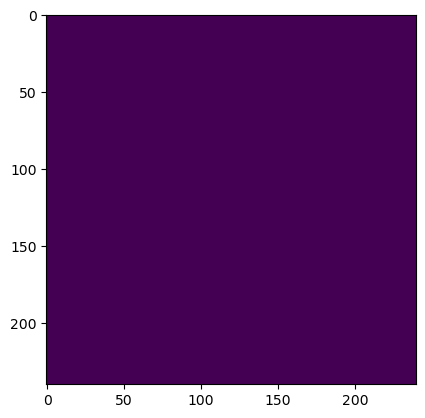

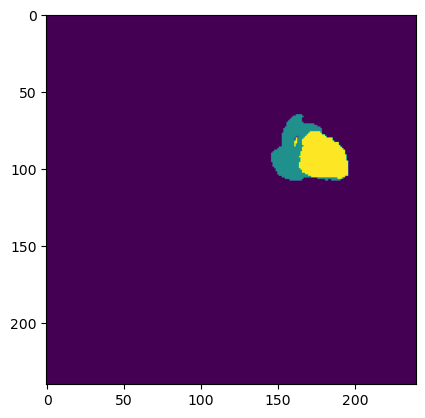

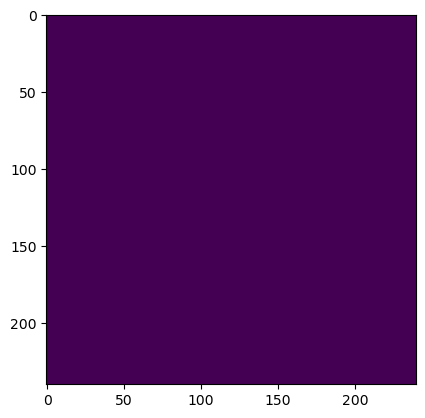

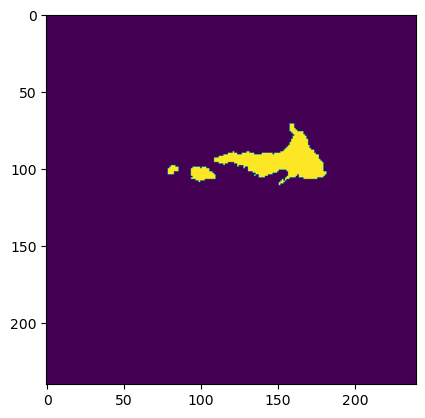

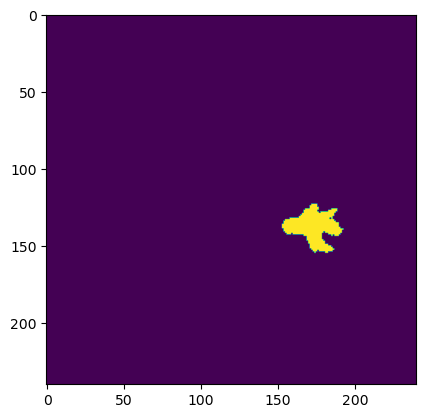

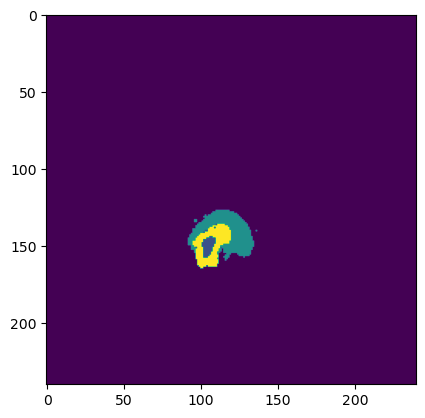

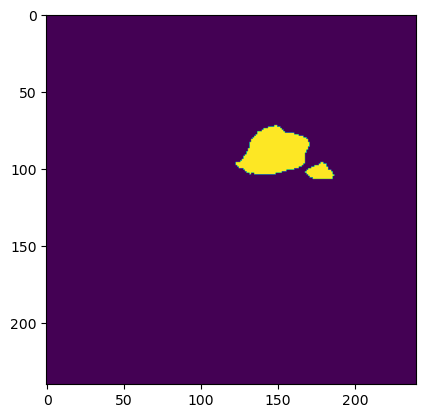

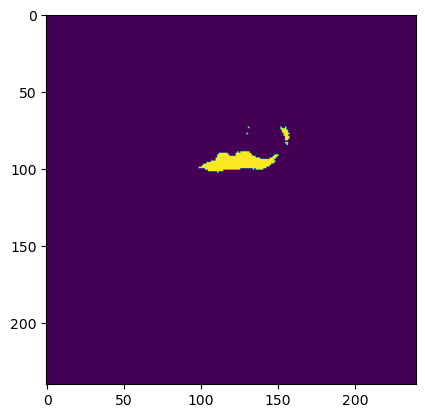

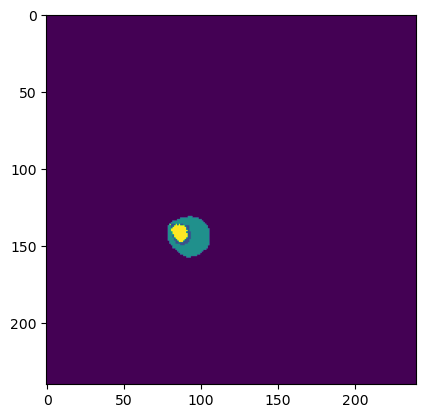

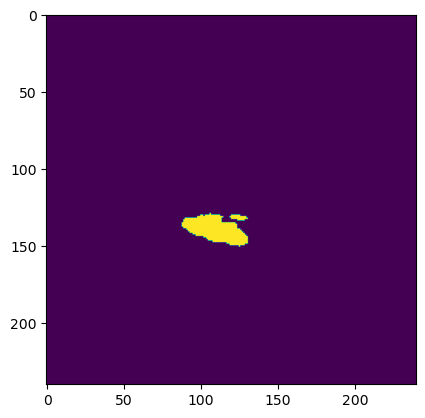

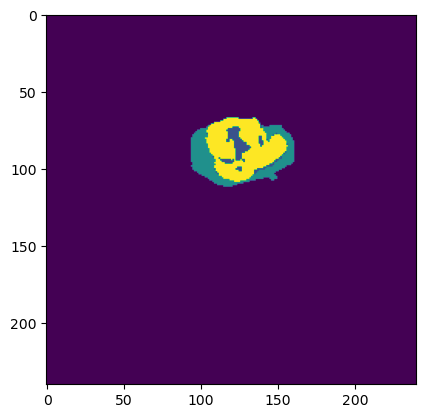

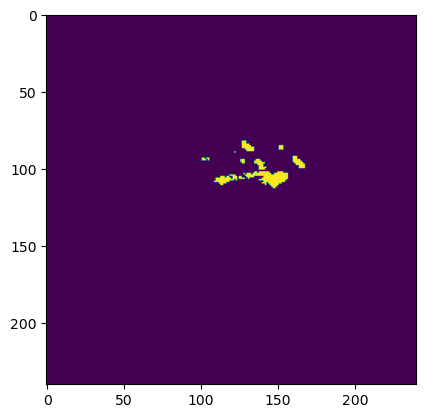

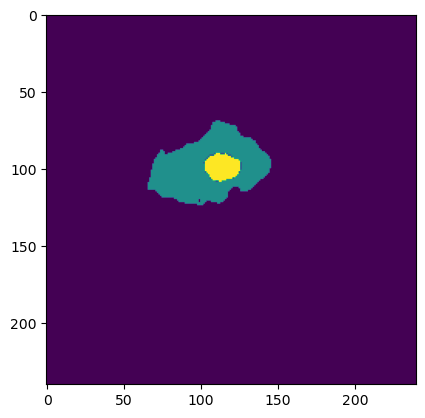

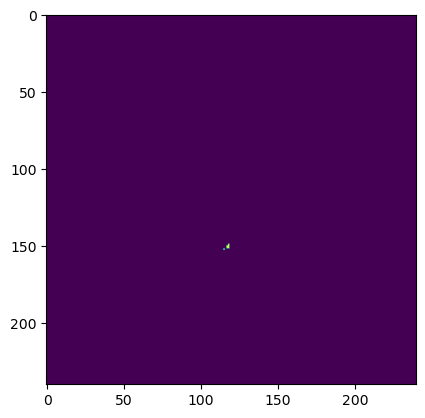

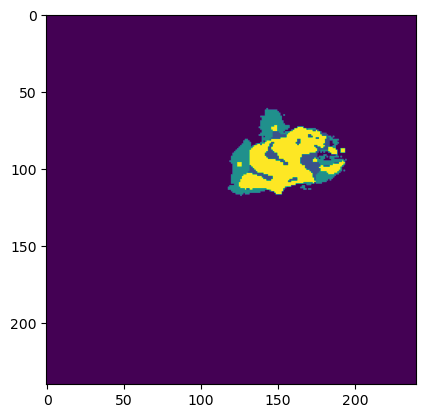

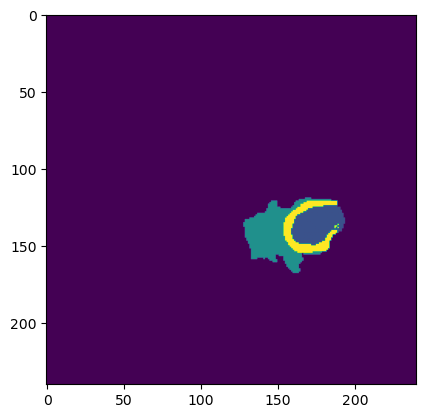

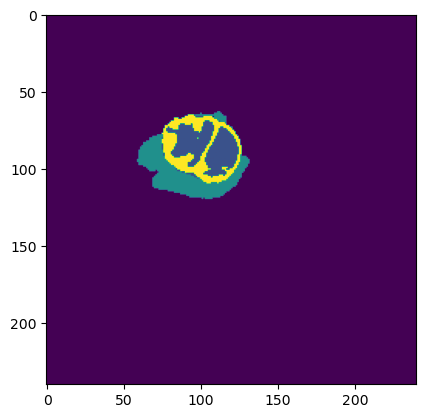

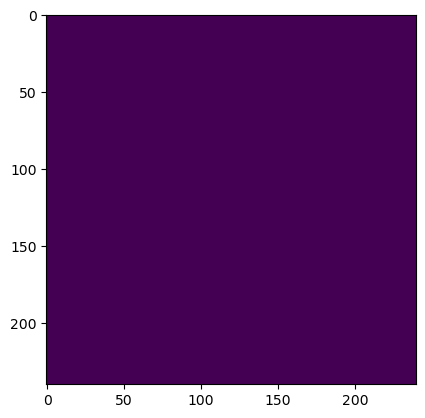

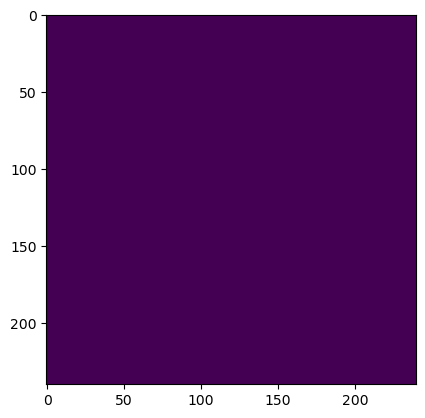

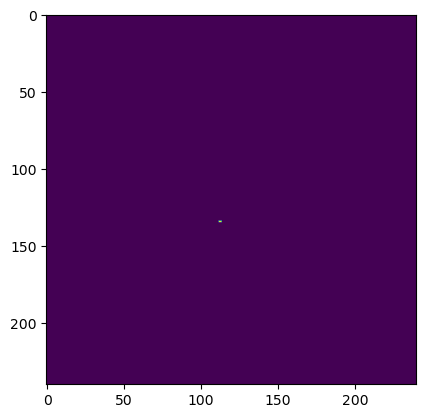

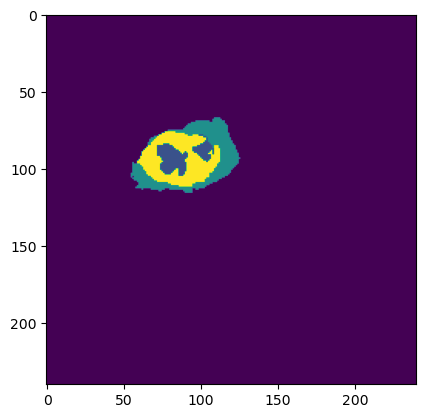

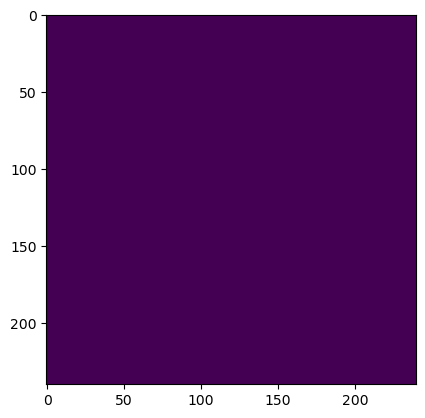

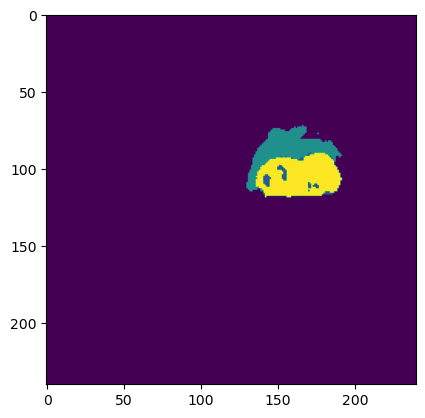

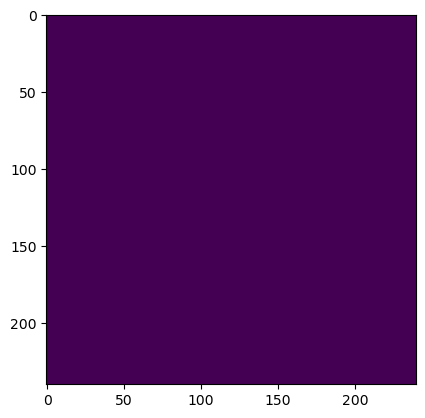

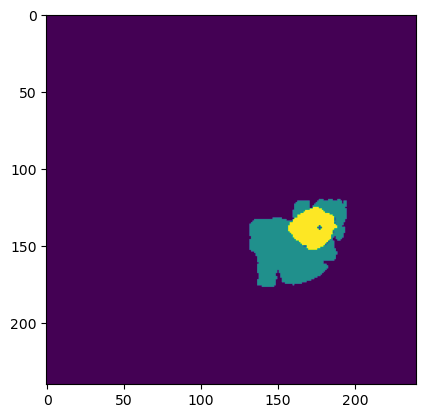

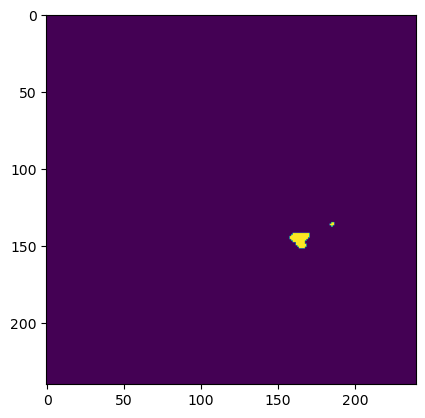

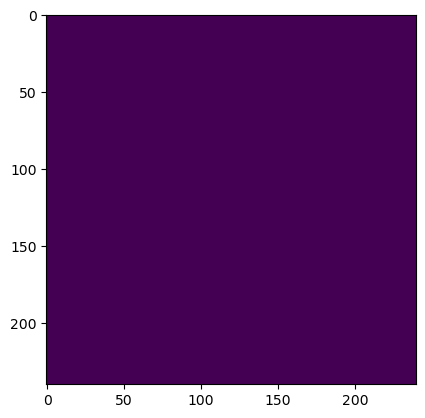

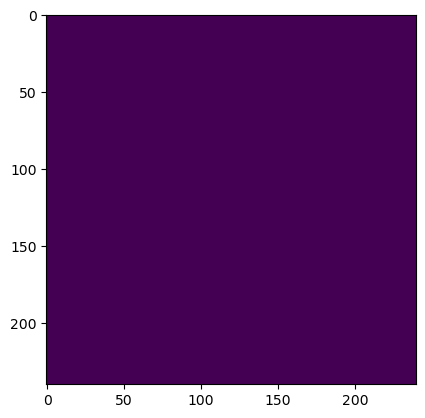

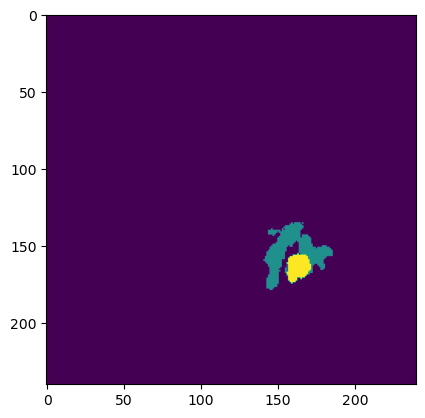

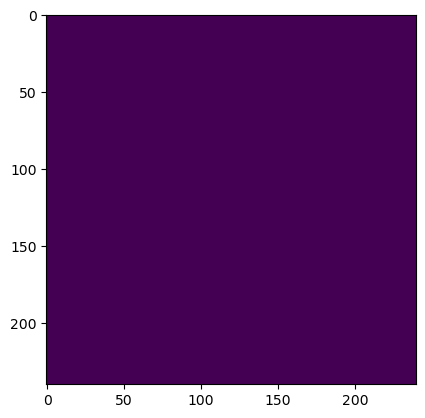

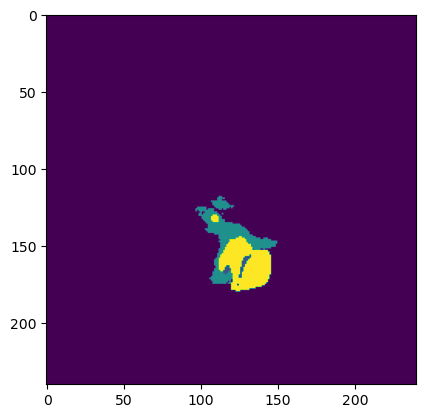

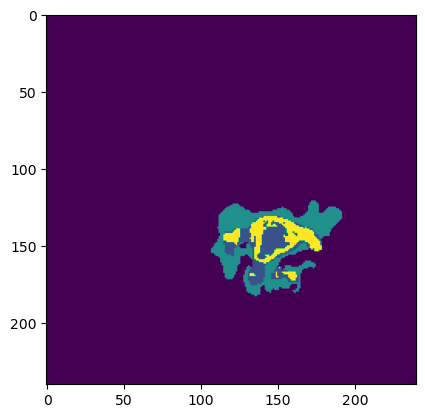

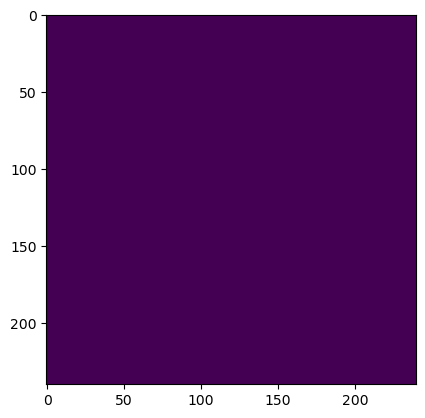

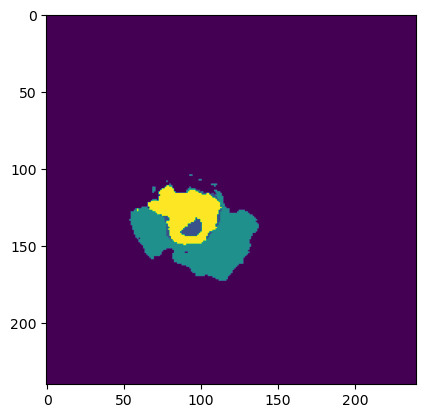

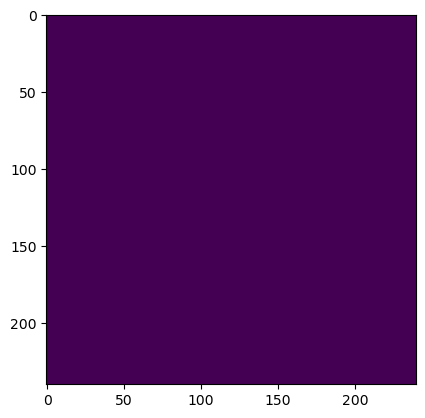

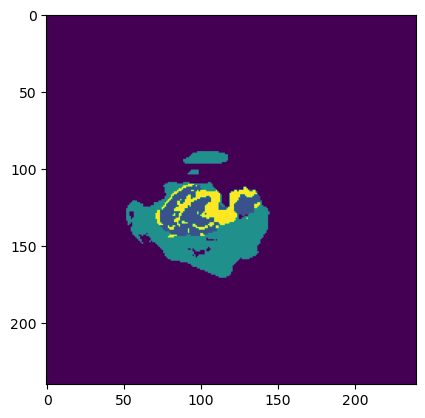

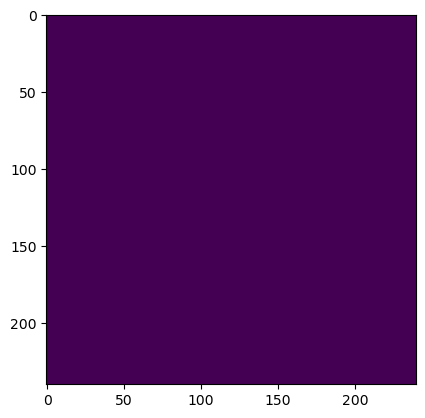

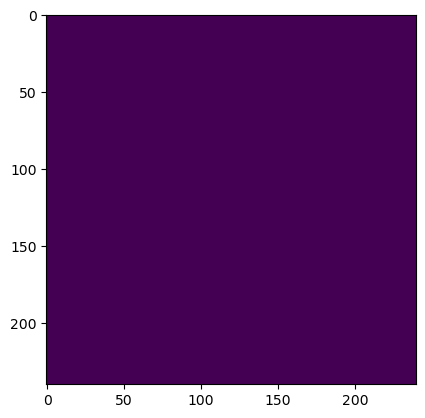

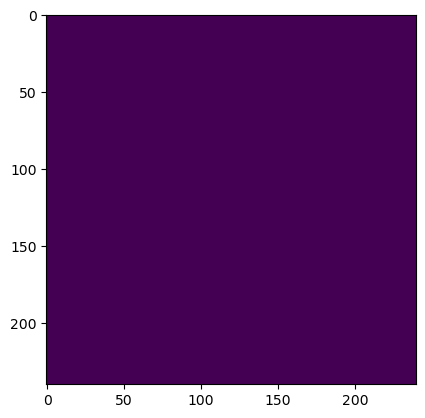

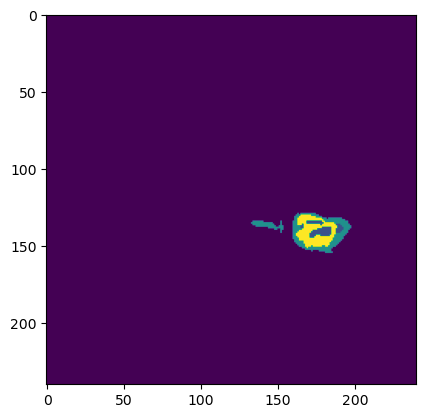

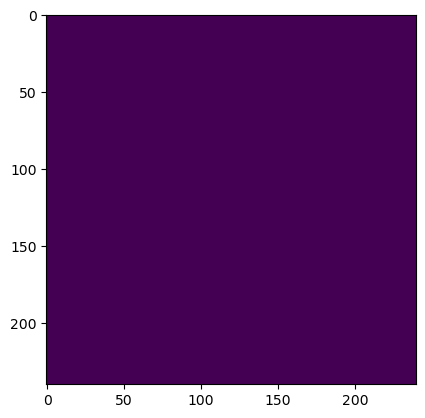

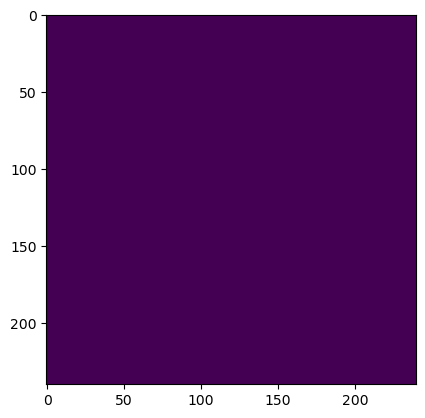

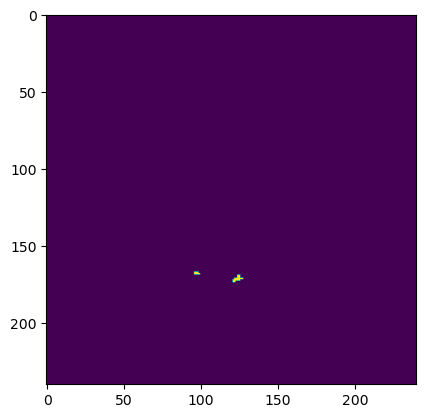

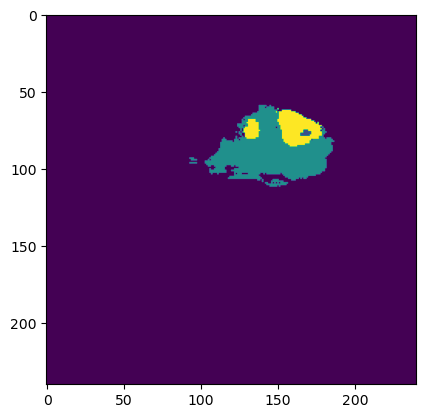

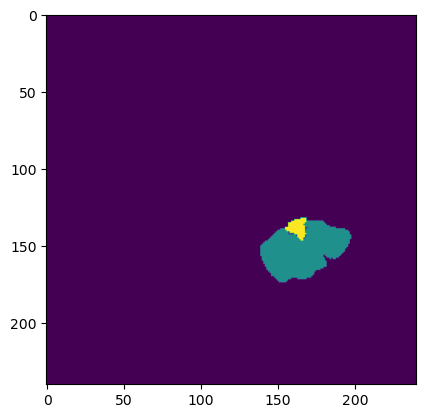

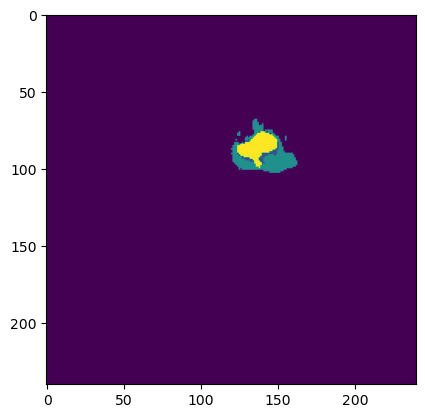

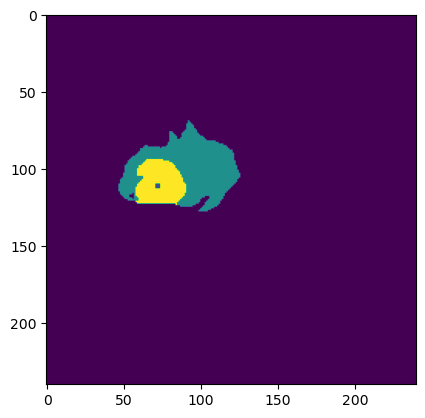

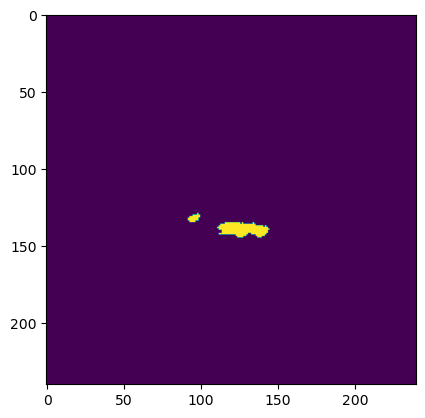

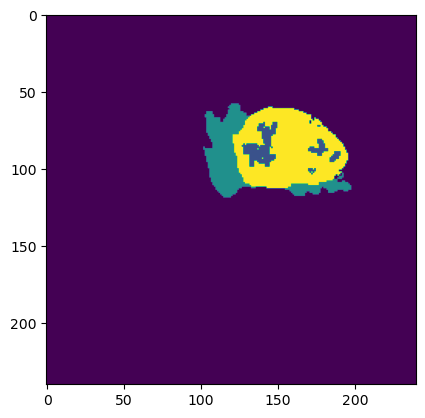

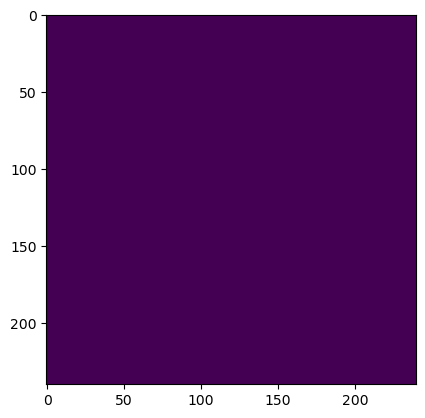

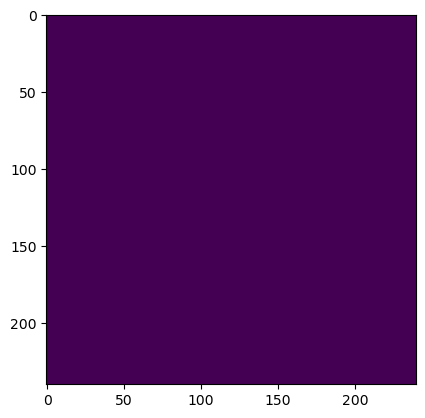

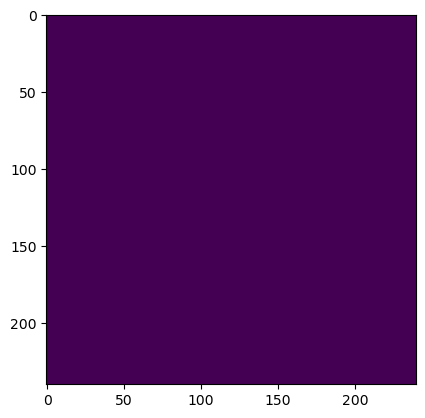

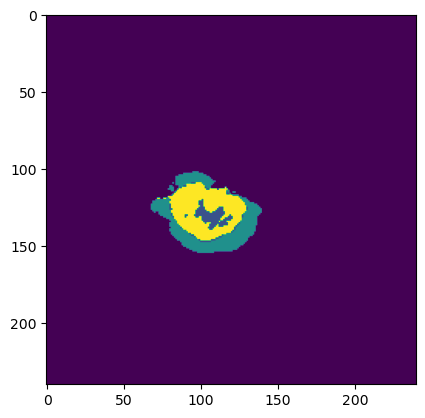

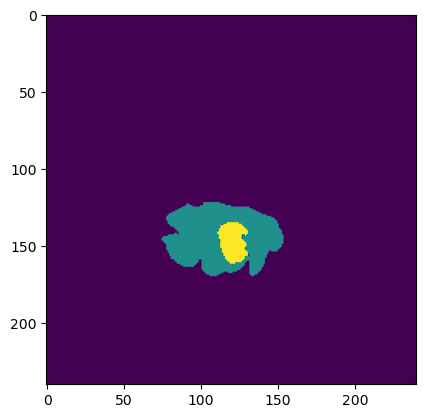

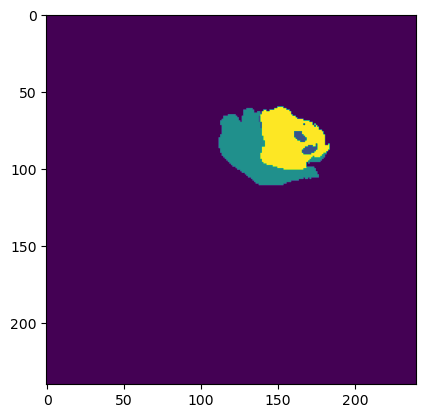

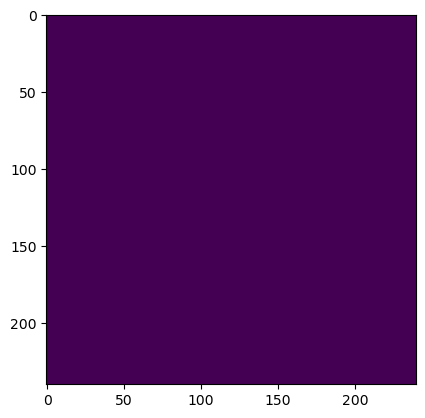

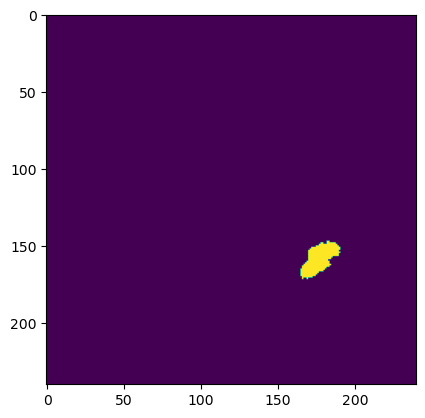

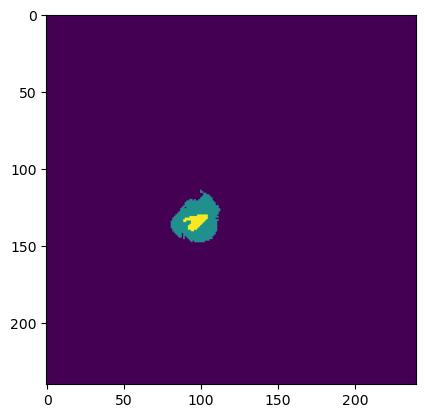

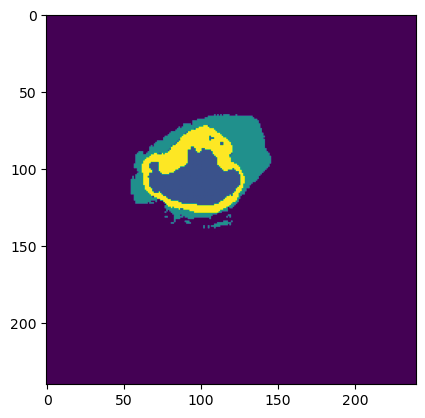

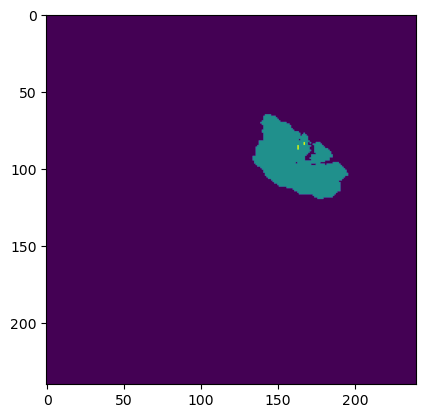

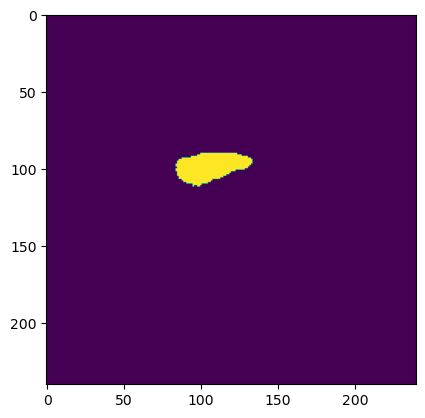

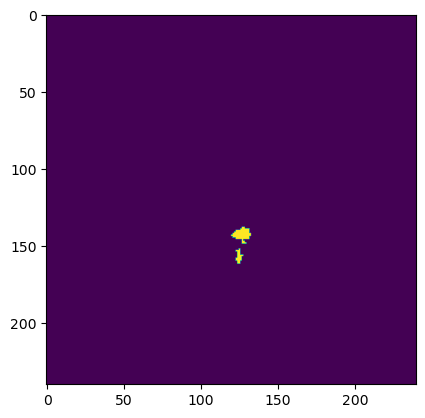

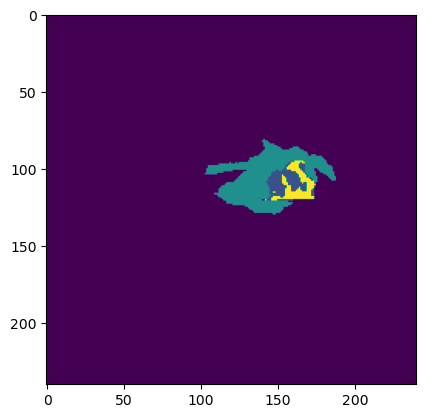

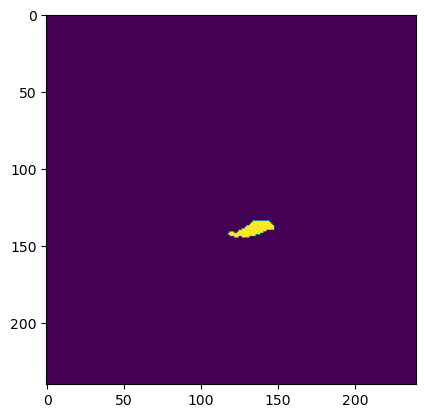

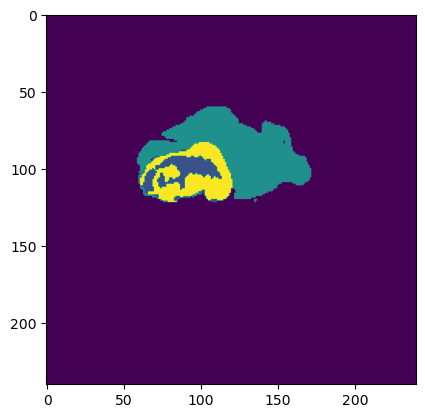

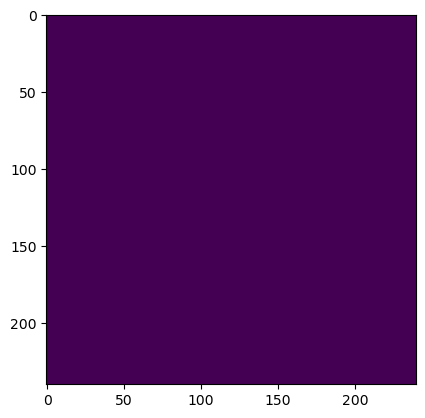

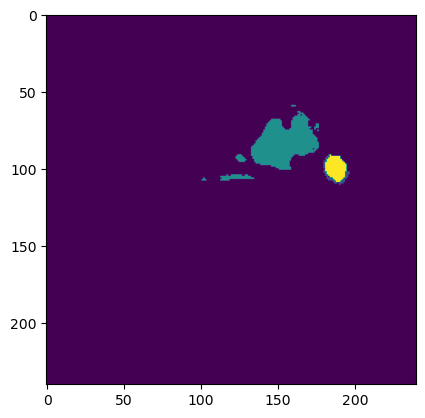

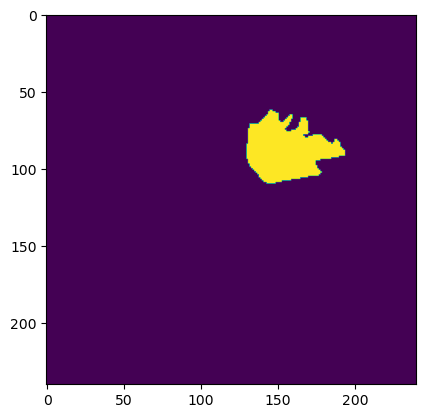

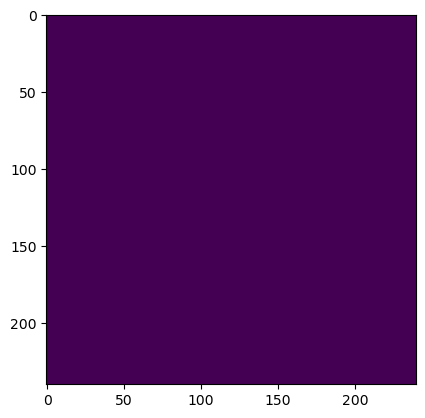

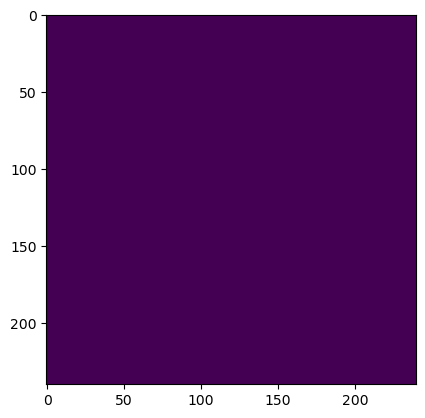

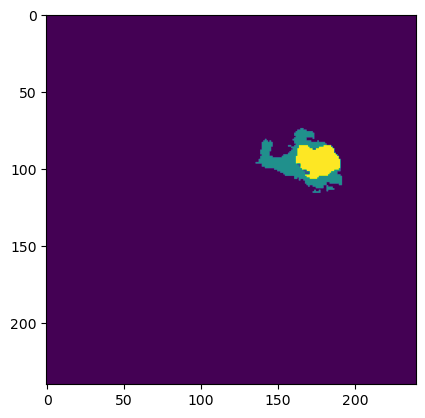

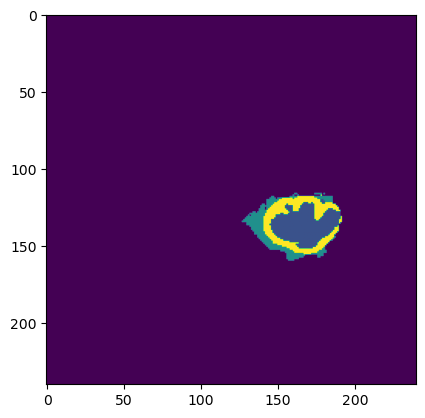

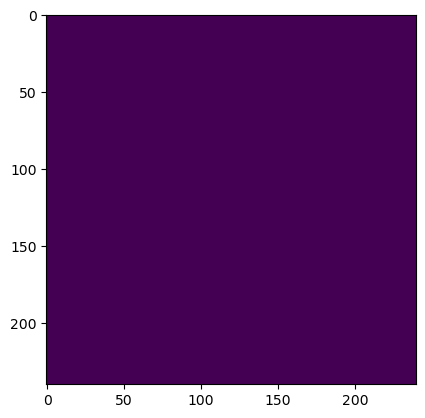

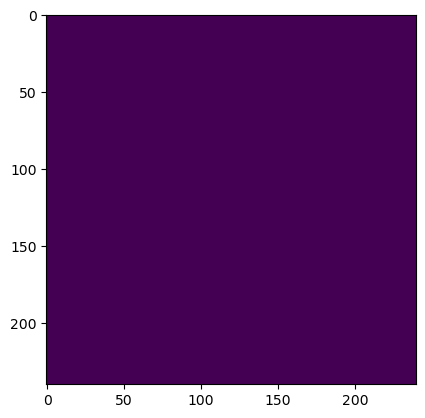

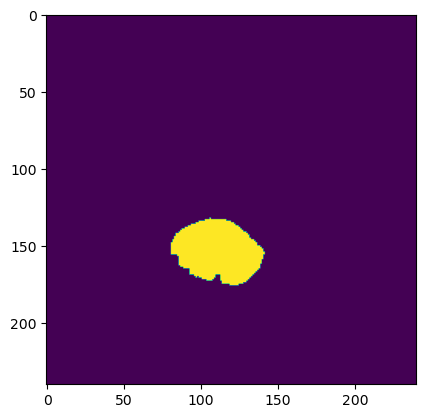

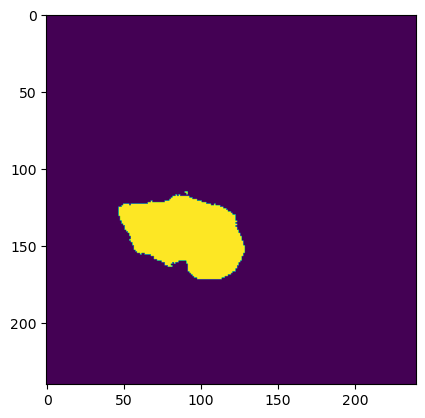

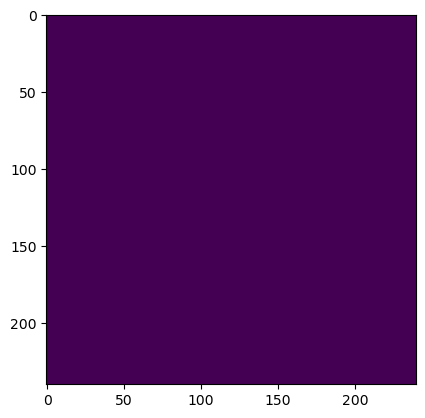

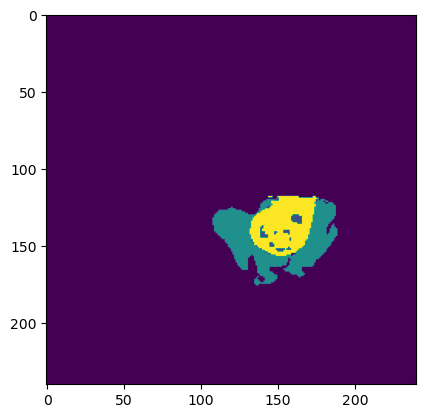

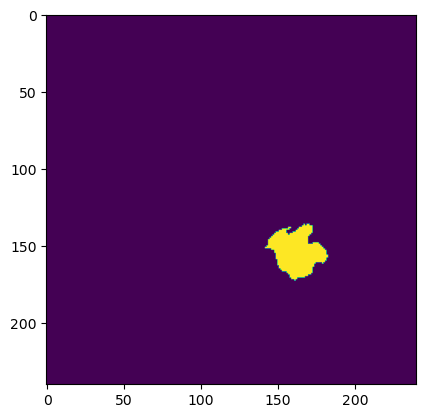

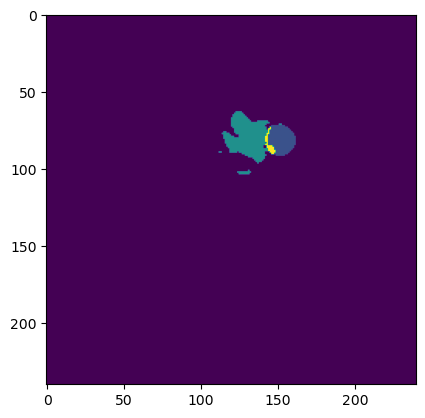

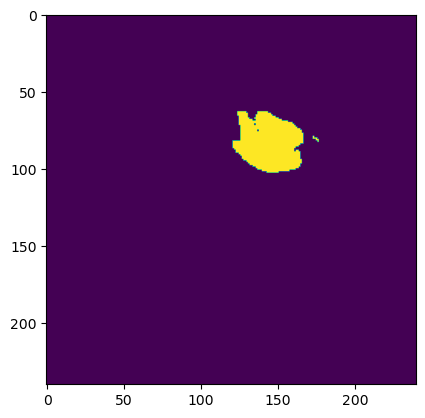

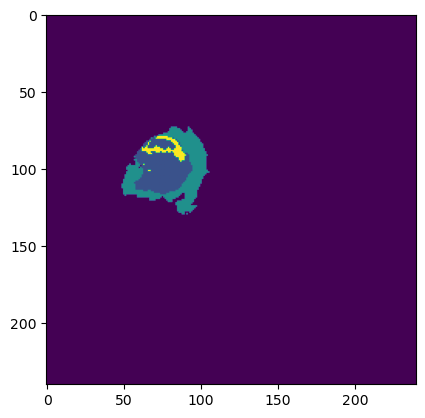

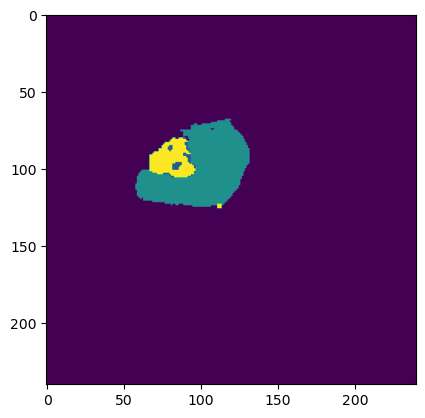

In [16]:
source = pd.read_csv(CSV_FILE)
for i in range(len(source)):
    if i == 0 :
        image_cat=source.iloc[i,0]
        image_id=source.iloc[i,4]
        mask = get_image(IMAGE_PATH,image_cat,image_id,'seg')
        temp = mask[:,:,90]
        np.set_printoptions(threshold=sys.maxsize)
        print((temp==2))

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False 

Text(0.5, 1.0, 't1 slices from 30 to 124')

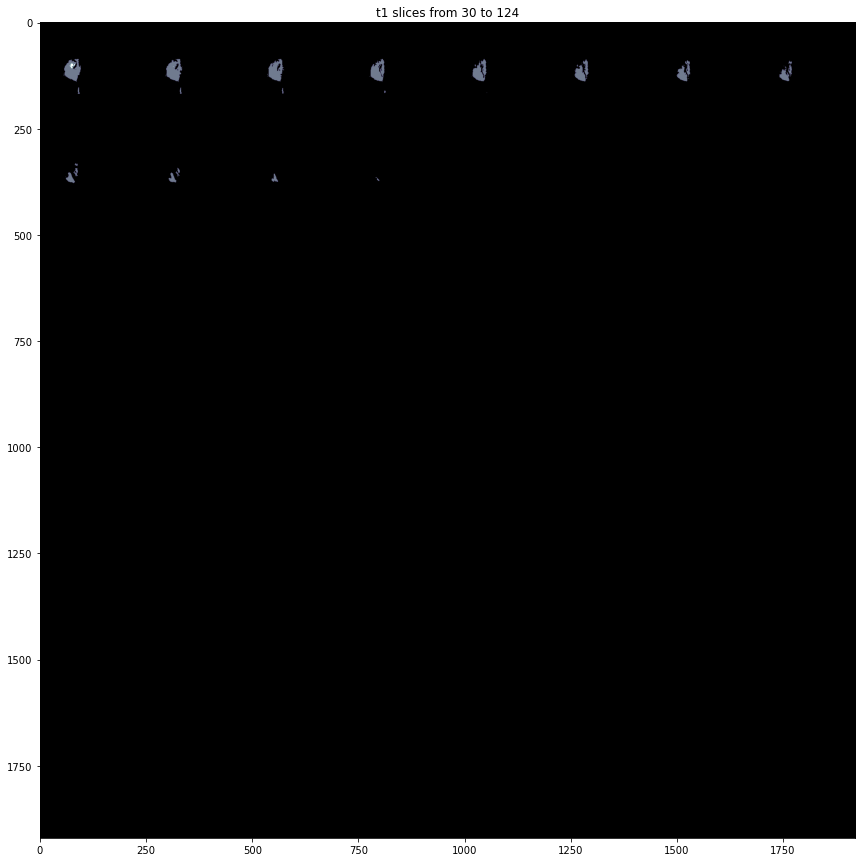

In [6]:
HGG_Path = 'data/MICCAI_BraTS_2019_Data_Training/'
img = np.zeros((1,240,240,1))
k = nib.load(HGG_Path+'HGG/BraTS19_CBICA_AAG_1/BraTS19_CBICA_AAG_1_seg.nii.gz').get_fdata()

fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(montage(k[:,:,70:-30].T),cmap='bone')
ax1.set_title('t1 slices from 30 to 124')

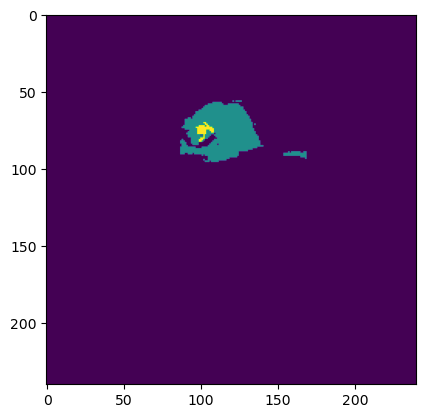

In [6]:
HGG_Path = 'data/MICCAI_BraTS_2019_Data_Training/'
k = nib.load(HGG_Path+'HGG/BraTS19_CBICA_AAG_1/BraTS19_CBICA_AAG_1_seg.nii.gz').get_fdata()
img = k[:,:,70]
figure()
imshow(img)
show()


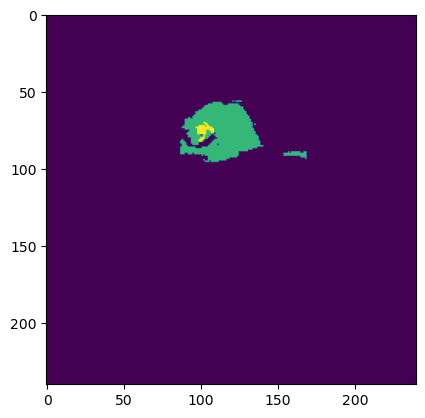

In [11]:
img[img==4]=3
figure()
imshow(img)
show()


torch.Size([240, 240, 4])


C:\Users\timlu\AppData\Local\Temp\ipykernel_17456\3649442890.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img).long()


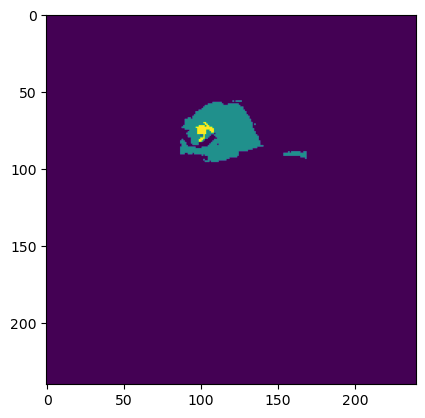

In [13]:
img = torch.tensor(img).long()
oh = F.one_hot(img)
print(oh.shape)
oh=oh.permute(0,2,1)
label = torch.argmax(oh, dim = 1)
label[label==3]=4
figure()
imshow(label)
show()

In [26]:
from torchmetrics.classification import MulticlassJaccardIndex
target = torch.tensor([2, 1, 0, 0])
preds = torch.tensor([2,1,0,0])
metric = MulticlassJaccardIndex(num_classes=3,ignore_index=[0],average='none')
metric(preds, target)


ValueError: Expected argument `ignore_index` to either be `None` or an integer, but got [0]